In [1]:
import pandas as pd
import io
import zipfile
import requests
import geopandas as gpd
import shapely.geometry
from shapely.geometry import Point
import pyproj
import numpy as np
import matplotlib.pyplot as plt
import math
import os, sys

from skimage.feature import hog
from skimage import data, exposure

print ("Imported!")

Imported!


In [2]:
#set up survey file paths

survey = "HI1509"

path = '..//..//..//Documents//Test_sets//Testing_Sample//HI1509//Scale_25000//Edits//'
pathshp = '..//..//..//Documents//Test_sets//Testing_Sample//HI1509'

array = np.load(path + 'array10m//arraymean.npy')
arraySS = np.load(path + 'array10m//arraySS.npy')

geosurveyp = pd.read_csv(path + 'HI1509_EPSG3035')
ss = pd.read_csv(path+'HI1509_SS.csv')

breakdown = 1

In [3]:
# step is the size of the gridding used (e.g. 10m by 10m)

step = 10
hogval = 3
savepath = '..//..//..//Documents//Test_sets//Testing_Sample//HOG_testsets_10m//comp//Mean'

In [4]:
#find the corners of the projected dataset and the min/max depth for plotting

minx = geosurveyp['Xp'].min()
maxx = geosurveyp['Xp'].max()
rangex = maxx-minx

print (minx, maxx, rangex)

miny = geosurveyp['Yp'].min()
maxy = geosurveyp['Yp'].max()
rangey = maxy-miny

print ( miny, maxy, rangey)

minz = geosurveyp['Depth'].min()
maxz = geosurveyp['Depth'].max()

3358785.38429 3365607.23965 6821.8553576
3646075.70214 3649540.16276 3464.46061328


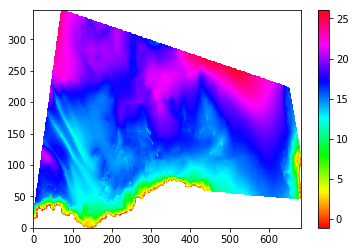

In [5]:
#col is the number of columns in the gridded dataset, rows the number of rows (found by dividing the length of each side in m by the step)
#plot the gridded survey to check it looks reasonable

col = math.ceil(rangex/step)
row = math.ceil(rangey/step)

xi = np.arange(0, col)
yi = np.arange(0, row)
X, Y = np.meshgrid(xi, yi)
Z = array[Y,X]

import numpy.ma as ma
Lm = ma.masked_where(np.isnan(Z),Z)

plt.pcolor(X, Y, Lm, cmap='hsv', vmin=minz, vmax=maxz)
plt.colorbar()

plt.show()

In [6]:
array.shape

(347, 683)

In [7]:

#array[np.isnan(array)] = np.nanmin(array)

# array[np.isnan(array)] = -1

In [8]:
# print(np.nanmin(array))

In [9]:
# val = float(np.nanmin(array)) - 1
# print(val)

In [10]:
# array[np.isnan(array)] = val

In [11]:
# print(np.nanmin(array),val)

/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


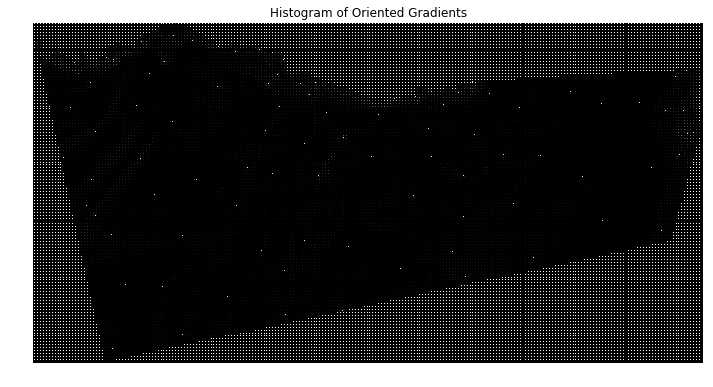

In [12]:
#HOG 

image = array

fd, hog_image = hog(image, orientations=4, pixels_per_cell=(hogval,hogval), cells_per_block=(1,1), visualise=True, feature_vector= False)

fig, (ax2) = plt.subplots(figsize=(12, 12))

#moved up arraySS = np.load(path + 'array5m//arraySS.npy')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

import numpy.ma as ma
Zm = ma.masked_equal(arraySS, 0)

ax2.axis('off')
im1 = ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
im2 = ax2.imshow(Zm,cmap=plt.cm.Wistia)
ax2.set_title('Histogram of Oriented Gradients')
# ax1.set_adjustable('box-forced')
plt.show()

In [13]:
#HOG produces a 4d array (row, col, block r,block c, then the 4 orientation values )
fd.shape

(115, 227, 1, 1, 4)

In [14]:
# create empty dataframe for output
HOG_output = pd.DataFrame()

In [15]:
rowH = int(fd.shape[0])
colH = int(fd.shape[1])

In [16]:
for r in range(0,fd.shape[0]):
    for c in range(0,fd.shape[1]):
        for a in range(0,1):
            for b in range(0,1):
                rown = [r,c,(fd[r][c][a][b][0]),(fd[r][c][a][b][1]),(fd[r][c][a][b][2]),(fd[r][c][a][b][3])]
                HOG_output = HOG_output.append([rown])
                print (fd[r][c][a][b])

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.44860923  0.          0.          0.55135766]
[ 0.47953431  0.19729156  0.32312012  0.        ]
[ 0.56065848  0.43930933  0.          0.        ]
[ 0.24752742  0.75244333  0.          0.        ]
[ 0.          0.99997008  0.          0.        ]
[ 0.          0.          0.99997865  0.        ]
[ 0.          0.          0.99997839  0.        ]
[ 0.          0.99998442  0.          0.        ]
[ 0.          0.99998858  0.          0.        ]
[ 0.         0.9999772  0.         0.       ]
[ 0.          0.99997231  0.          0.        ]
[ 0.27914434  0.72081857  0.          0.        ]
[ 0.          0.99997651  0.          0.        ]
[ 0.          0.93919276  0.          0.06075434]
[ 0.          0.7163363   0.          0.28322881]
[ 0.          0.2038497   0.41946351  0.37633788]
[ 0.  

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.          0.99996781  0.        ]
[ 0.          0.          0.99998405  0.        ]
[ 0.          0.          0.99999231  0.        ]
[ 0.          0.30216871  0.69782079  0.        ]
[ 0.          0.15172452  0.84826311  0.        ]
[ 0.          0.53188284  0.46809516  0.        ]
[ 0.          0.          0.54846622  0.45151437]
[ 0.99998074  0.          0.          0.        ]
[ 0.          0.24710412  0.75287164  0.        ]
[ 0.          0.12820401  0.53835547  0.33342795]
[ 0.          0.

[ 0.27528409  0.          0.34750605  0.37713886]
[ 0.99994945  0.          0.          0.        ]
[ 0.31275358  0.          0.          0.68715786]
[ 0.21684497  0.          0.          0.783087  ]
[ 0.          0.          0.19404195  0.80593622]
[ 0.          0.          0.99994559  0.        ]
[ 0.          0.          0.49120025  0.50874162]
[ 0.49729171  0.50265265  0.          0.        ]
[ 0.2792854   0.21293813  0.50772981  0.        ]
[ 0.          0.          0.          0.99997902]
[ 0.          0.99997761  0.          0.        ]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ 0.74749172  0.          0.          0.25188499]
[ 0.          0.          0.19300004  0.80642563]
[ 0.          0.09889273  0.71286558  0.18755449]
[ 0.47824095  0.          0.29697691  0.22376465]
[ 0.          0.          0.          0.99951309]
[ 0.06332881  0.24050953  0.          0.69467977]
[ 0.25336985  0.          0.30847226  0.43435734]
[ 0.          0.          0.71388088  0.28559877]
[ 0.          0.          0.7535907   0.24605499]
[ 0.          0.          0.99966646  0.        ]
[ 0.          0.          0.99975333  0.        ]
[ 0.          0.23289453  0.76687846  0.        ]
[ 0.          0.75868292  0.24111384  0.        ]
[ 0.          0.99979966  0.          0.        ]
[ 0.45193363  0.5478679   0.          0.        ]
[ 0.          0.50759131  0.4922832   0.        ]
[ 0.2596077   0.74016768  0.          0.        ]
[ 0.          0.          0.51626508  0.48362371]
[ 0.          0.          0.99984651  0.        ]
[ 0.49332115  0.          0.          0.50654751]


[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ 0.99995439  0.          0.          0.        ]
[ 0.99995961  0.          0.          0.        ]
[ 0.99998911  0.          0.          0.        ]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.50808008  0.          0.          0.49174688]
[ 0.57425572  0.          0.          0.42555891]
[ 0.7241216   0.27561926  0.          0.        ]
[ 0.7306529   0.          0.          0.26925522]
[ 0.          0.07577755  0.          0.92403859]
[ 0.          0.1428975   0.54096942  0.31579482]
[ 0.          0.54229319  0.45737565  0.        ]
[ 0.          0.99979644  0.          0.        ]
[ 0.          0.73178919  0.26804481  0.        ]
[ 0.          0.          0.99986505  0.        ]
[ 0.          0.25257468  0.74730671  0.        ]
[ 0.         0.9999023  0.         0.       ]
[ 0.          0.99987086  0.          0.        ]
[ 0.          0.99983048  0.          0.        ]
[ 0.          0.99981447  0.          0.        ]
[ 0.          0.

[ 0.          0.          0.78780489  0.21181208]
[ 0.          0.          0.99958673  0.        ]
[ 0.          0.          0.2532473   0.74634689]
[ 0.          0.          0.99958202  0.        ]
[ 0.          0.          0.          0.99966664]
[ 0.          0.          0.24943338  0.75024115]
[ 0.          0.          0.24117487  0.75850158]
[ 0.          0.          0.72433453  0.2753863 ]
[ 0.          0.          0.25101038  0.74866245]
[ 0.51030248  0.          0.          0.48962505]
[ 0.22471014  0.          0.          0.77522938]
[ 0.          0.13924985  0.51835931  0.34230833]
[ 0.21187237  0.          0.5695554   0.21840129]
[ 0.          0.          0.24336081  0.7565379 ]
[ 0.          0.          0.20514996  0.79475461]
[ 0.27427179  0.          0.          0.72565323]
[ 0.44938636  0.          0.          0.55057706]
[ 0.99997868  0.          0.          0.        ]
[ 0.8011768   0.          0.          0.19881192]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan 

[ 0.          0.99958549  0.          0.        ]
[ 0.25162039  0.51935559  0.22850987  0.        ]
[ 0.3812048   0.61863561  0.          0.        ]
[ 0.          0.67758709  0.3219862   0.        ]
[ 0.72087334  0.27884477  0.          0.        ]
[ 0.91660583  0.          0.          0.08308387]
[ 0.62078192  0.37844454  0.          0.        ]
[ 0.          0.11972879  0.87941999  0.        ]
[ 0.76081028  0.17913988  0.05725849  0.        ]
[ 0.          0.76289221  0.          0.23634811]
[ 0.62077615  0.29262739  0.          0.08573379]
[ 0.70069388  0.29908166  0.          0.        ]
[ 0.27153332  0.72802878  0.          0.        ]
[ 0.48201961  0.517576    0.          0.        ]
[ 0.22244423  0.77731781  0.          0.        ]
[ 0.40587483  0.59385027  0.          0.        ]
[ 0.          0.99956439  0.          0.        ]
[ 0.30522421  0.          0.          0.69449264]
[ 0.          0.36818048  0.63124774  0.        ]
[ 0.          0.85271083  0.14692187  0.        ]


[ 0.          0.99976173  0.          0.        ]
[ 0.43663423  0.56306961  0.          0.        ]
[ 0.75112076  0.24862092  0.          0.        ]
[ 0.99971876  0.          0.          0.        ]
[ 0.         0.         0.6722053  0.3273364]
[ 0.11370711  0.88600361  0.          0.        ]
[ 0.          0.99971943  0.          0.        ]
[ 0.          0.99971065  0.          0.        ]
[ 0.          0.53216705  0.46754547  0.        ]
[ 0.          0.78543361  0.2143201   0.        ]
[ 0.36073935  0.6390343   0.          0.        ]
[ 0.61185326  0.38789444  0.          0.        ]
[ 0.20927292  0.79043545  0.          0.        ]
[ 0.72953574  0.27010074  0.          0.        ]
[ 0.29513523  0.70447288  0.          0.        ]
[ 0.20608084  0.79366237  0.          0.        ]
[ 0.99977312  0.          0.          0.        ]
[ 0.          0.99962181  0.          0.        ]
[ 0.          0.99948037  0.          0.        ]
[ 0.          0.99984822  0.          0.        ]
[ 0.

[ 0.99997405  0.          0.          0.        ]
[ 0.          0.51096457  0.48874207  0.        ]
[ 0.          0.99977977  0.          0.        ]
[ 0.63068544  0.36917553  0.          0.        ]
[ 0.          0.99978106  0.          0.        ]
[ 0.          0.5317402   0.46801336  0.        ]
[ 0.          0.99964988  0.          0.        ]
[ 0.          0.99980816  0.          0.        ]
[ 0.          0.99964582  0.          0.        ]
[ 0.          0.798609    0.20091107  0.        ]
[ 0.          0.21532492  0.78396148  0.        ]
[ 0.          0.97978804  0.01930833  0.        ]
[ 0.6027662   0.39671529  0.          0.        ]
[ 0.         0.         0.2355821  0.7641304]
[ 0.24805257  0.24551471  0.50628984  0.        ]
[ 0.6920379   0.30777843  0.          0.        ]
[ 0.25678038  0.74292889  0.          0.        ]
[ 0.9997557  0.         0.         0.       ]
[ 0.99977693  0.          0.          0.        ]
[ 0.          0.99974221  0.          0.        ]
[ 0.2105

[ 0.          0.78689554  0.21307206  0.        ]
[ 0.          0.          0.99998727  0.        ]
[ nan  nan  nan  nan]
[ 0.          0.76018926  0.23979441  0.        ]
[ 0.          0.46002927  0.53995374  0.        ]
[ 0.24908349  0.75090296  0.          0.        ]
[ 0.          0.74313147  0.25684226  0.        ]
[ 0.          0.74748678  0.2524786   0.        ]
[ 0.          0.527639    0.47233389  0.        ]
[ 0.          0.          0.73711572  0.26286258]
[ 0.21332902  0.78665259  0.          0.        ]
[ 0.22338698  0.77657358  0.          0.        ]
[ 0.299656    0.70031943  0.          0.        ]
[ 0.          0.99996929  0.          0.        ]
[ 0.30650965  0.          0.69344682  0.        ]
[ 0.42249087  0.27986138  0.          0.29761633]
[ 0.          0.99998121  0.          0.        ]
[ 0.          0.99993998  0.          0.        ]
[ 0.2790473   0.72092611  0.          0.        ]
[ 0.          0.99990139  0.          0.        ]
[ 0.31147963  0.68834714  0.

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.73926212  0.26071757  0.          0.        ]
[ 0.          0.99996649  0.          0.        ]
[ 0.          0.99998332  0.          0.        ]
[ 0.          0.99997442  0.          0.        ]
[ 0.          0.          0.99997432  0.        ]
[ 0.          0.          0.99998357  0.        ]
[ 0.          0.30199154  0.69799079  0.        ]
[ 0.          0.22258831  0.77739628  0.        ]
[ 0.          0.30789749  0.69207948  0.        ]
[ 0.          0.34379046  0.65616917  0.        ]
[ 0.          0.76304072  0.23692791  0.        ]
[ 0.          0.43051435  0.56945552  0.        ]
[ 0.          0.52491721  0.24559414  0.22945462

[ 0.          0.          0.99991284  0.        ]
[ 0.          0.          0.99994033  0.        ]
[ 0.          0.          0.99993572  0.        ]
[ 0.          0.          0.99990282  0.        ]
[ 0.         0.         0.9999116  0.       ]
[ 0.          0.61335561  0.38659013  0.        ]
[ 0.          0.          0.27171914  0.72818902]
[ 0.          0.61859587  0.38136528  0.        ]
[ 0.          0.99997287  0.          0.        ]
[ 0.          0.89146463  0.10847238  0.        ]
[ 0.          0.          0.99992838  0.        ]
[ 0.          0.26861607  0.73133276  0.        ]
[ 0.          0.          0.99994373  0.        ]
[ 0.          0.53069906  0.46926296  0.        ]
[ 0.          0.          0.76041288  0.2395597 ]
[ 0.          0.          0.48413983  0.51582881]
[ 0.          0.          0.99996682  0.        ]
[ 0.          0.          0.99995766  0.        ]
[ 0.80935909  0.19057214  0.          0.        ]
[ 0.          0.4722243   0.52774509  0.        ]
[ 0.

[ 0.          0.6740183   0.32484841  0.        ]
[ 0.47178372  0.52769483  0.          0.        ]
[ 0.50562896  0.4940551   0.          0.        ]
[ 0.          0.99974882  0.          0.        ]
[ 0.          0.99972766  0.          0.        ]
[ 0.          0.99976386  0.          0.        ]
[ 0.26747524  0.73229463  0.          0.        ]
[ 0.21696428  0.78280505  0.          0.        ]
[ 0.          0.99977086  0.          0.        ]
[ 0.29077907  0.70907694  0.          0.        ]
[ 0.          0.99991662  0.          0.        ]
[ 0.          0.47254032  0.52736673  0.        ]
[ 0.          0.31074255  0.36224412  0.32685428]
[ 0.          0.          0.91057332  0.0893132 ]
[ 0.          0.48490108  0.49882465  0.01605589]
[ 0.25148626  0.          0.30605629  0.44236048]
[ 0.73235604  0.          0.08076867  0.18676585]
[ 0.          0.          0.55227632  0.44765655]
[ 0.26490453  0.27468635  0.46032752  0.        ]
[ 0.          0.          0.99993458  0.        ]


[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.          0.18484317  0.81483516]
[ 0.         0.         0.9996045  0.       ]
[ 0.2469386   0.          0.2367575   0.51606328]
[ 0.          0.99975426  0.          0.        ]
[ 0.73572468  0.26390481  0.          0.        ]
[ 0.44173543  0.5579977   0.          0.        ]
[ 0.          0.99971919  0.          0.        ]
[ 0.         0.7333535  0.2662997  0.       ]
[ 0.15098788  0.          0.7948702   0.05338227]
[ 0.          0.28749675  0.14118885  0.57061277]
[ 0.31868877  0.68066656  0.          0.        ]
[ 0.          0.99972235  0.          0.        ]
[ 0.26928258  0.73044039  0.          0.        ]
[ 0.73172021  0.26792605  0.          0.        ]
[ 0.          0.72924428  0.27019814  0.        ]
[ 0.          0.          0.99961439  0.        ]
[ 0.          0.          0.45018908  0.54933849]
[ 0.          0.51629899  0.48340868  0.        ]
[ 0.          0.3571

[ 0.49538999  0.50433871  0.          0.        ]
[ 0.74139793  0.          0.25824109  0.        ]
[ 0.28766037  0.71185098  0.          0.        ]
[ 0.          0.99964659  0.          0.        ]
[ 0.          0.39505401  0.60452798  0.        ]
[ 0.          0.88228997  0.11705996  0.        ]
[ 0.          0.99934728  0.          0.        ]
[ 0.13939306  0.54282256  0.31730749  0.        ]
[ 0.          0.          0.4493097   0.55051109]
[ 0.          0.30522603  0.6942209   0.        ]
[ 0.          0.          0.99942621  0.        ]
[ 0.          0.          0.30818969  0.69133761]
[ 0.          0.          0.31529796  0.68416766]
[ 0.          0.          0.17853163  0.82087329]
[ 0.99992864  0.          0.          0.        ]
[ 0.          0.99991809  0.          0.        ]
[ 0.         0.         0.         0.9997022]
[ 0.         0.         0.         0.9998773]
[ 0.          0.          0.39204051  0.60776584]
[ 0.40949801  0.          0.          0.59025688]
[ 0.3675

[ 0.          0.          0.79257745  0.20710224]
[ 0.          0.          0.82951841  0.16990404]
[ 0.          0.          0.49801135  0.5016532 ]
[ 0.          0.54818315  0.45148301  0.        ]
[ 0.          0.99962387  0.          0.        ]
[ 0.40525433  0.39100339  0.20334195  0.        ]
[ 0.16558158  0.          0.2027639   0.63097202]
[ 0.          0.99953034  0.          0.        ]
[ 0.          0.99954008  0.          0.        ]
[ 0.9996329  0.         0.         0.       ]
[ 0.53534624  0.          0.46451471  0.        ]
[ 0.2436971   0.26042542  0.          0.49565301]
[ 0.8537608   0.14572079  0.          0.        ]
[ 0.99972854  0.          0.          0.        ]
[ 0.62985032  0.24047798  0.12920519  0.        ]
[ 0.          0.39472899  0.          0.60493231]
[ 0.80106832  0.19867031  0.          0.        ]
[ 0.          0.99979485  0.          0.        ]
[ 0.          0.88186367  0.11776042  0.        ]
[ 0.         0.9997627  0.         0.       ]
[ 0.    

[ 0.18215109  0.10440214  0.713157    0.        ]
[ 0.          0.54687975  0.21076426  0.24208559]
[ 0.20484389  0.          0.58864975  0.20608868]
[ 0.09625576  0.26204155  0.4000749   0.24114521]
[ 0.          0.          0.99962767  0.        ]
[ 0.          0.          0.99976007  0.        ]
[ 0.          0.          0.53731872  0.46245837]
[ 0.          0.          0.99977748  0.        ]
[ 0.         0.         0.9997835  0.       ]
[ 0.          0.          0.99978993  0.        ]
[ 0.          0.          0.99981202  0.        ]
[ 0.          0.          0.99980553  0.        ]
[ 0.          0.          0.99976823  0.        ]
[ 0.          0.          0.99982496  0.        ]
[ 0.          0.          0.99981679  0.        ]
[ 0.          0.          0.99985291  0.        ]
[ 0.          0.13183322  0.86811477  0.        ]
[ 0.          0.99987446  0.          0.        ]
[ 0.          0.76416091  0.23563457  0.        ]
[ 0.          0.99979776  0.          0.        ]
[ 0.

[ 0.         0.         0.9998662  0.       ]
[ 0.          0.22157871  0.40864502  0.36966483]
[ 0.44641651  0.          0.          0.55350089]
[ 0.27192689  0.2781706   0.44866948  0.        ]
[ 0.          0.          0.51456158  0.48475981]
[ 0.20469517  0.          0.40930874  0.38530814]
[ 0.17351018  0.          0.49967869  0.32594771]
[ 0.08778822  0.          0.91059537  0.        ]
[ 0.          0.          0.26575662  0.7227627 ]
[ 0.13107913  0.86826769  0.          0.        ]
[ 0.          0.56952091  0.4302606   0.        ]
[ 0.          0.          0.99981222  0.        ]
[ 0.          0.          0.99985574  0.        ]
[ 0.          0.77945485  0.22037987  0.        ]
[ 0.          0.99976213  0.          0.        ]
[ 0.          0.          0.21215491  0.78758076]
[ 0.          0.          0.99980097  0.        ]
[ 0.          0.          0.99981917  0.        ]
[ 0.          0.86208448  0.13777039  0.        ]
[ 0.51680582  0.48295374  0.          0.        ]
[ 0.

[ 0.999819  0.        0.        0.      ]
[ 0.76056847  0.          0.          0.23918161]
[ 0.9998408  0.         0.         0.       ]
[ 0.          0.          0.          0.99986463]
[ 0.22228853  0.17127129  0.16827024  0.43797339]
[ 0.          0.12146129  0.11235244  0.76595552]
[ 0.25596211  0.          0.74381082  0.        ]
[ 0.42758423  0.10503083  0.          0.46724762]
[ 0.48686787  0.5123743   0.          0.        ]
[ 0.49049468  0.5090927   0.          0.        ]
[ 0.48496817  0.51459462  0.          0.        ]
[ 0.         0.9994537  0.         0.       ]
[ 0.          0.99952031  0.          0.        ]
[ 0.          0.          0.99953859  0.        ]
[ 0.          0.          0.99957914  0.        ]
[ 0.          0.08479682  0.91488117  0.        ]
[ 0.          0.          0.99976247  0.        ]
[ 0.         0.         0.9997424  0.       ]
[ 0.          0.          0.7662664   0.23351851]
[ 0.          0.51238479  0.4874023   0.        ]
[ 0.          0.9997

[ 0.          0.99969593  0.          0.        ]
[ 0.26417192  0.73547076  0.          0.        ]
[ 0.          0.71414623  0.28452376  0.        ]
[ 0.77247175  0.22722091  0.          0.        ]
[ 0.99986142  0.          0.          0.        ]
[ 0.99985681  0.          0.          0.        ]
[ 0.52531789  0.34906613  0.          0.12505485]
[ 0.52087183  0.47871057  0.          0.        ]
[ 0.          0.99974992  0.          0.        ]
[ 0.          0.99974571  0.          0.        ]
[ 0.          0.99954064  0.          0.        ]
[ 0.41545742  0.03089908  0.21005465  0.34268561]
[ 0.19607752  0.80355277  0.          0.        ]
[ 0.          0.99966847  0.          0.        ]
[ 0.          0.99951043  0.          0.        ]
[ 0.          0.          0.99951309  0.        ]
[ 0.          0.          0.99953615  0.        ]
[ 0.          0.          0.          0.99961167]
[ 0.          0.          0.          0.99974603]
[ 0.          0.          0.          0.99978805]


[ 0.          0.56399275  0.43595216  0.        ]
[ 0.50659886  0.14441653  0.34892592  0.        ]
[ 0.35071246  0.          0.          0.64926935]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.99981612  0.          0.        ]
[ 0.          0.72553876  0.27430322  0.        ]
[ 0.          0.73507601  0.26478731  0.        ]
[ 0.          0.48373466  0.51614061  0.        ]
[ 0.          0.          0.99989775  0.        ]
[ 0.          0.          0.38674723  0.61313232]
[ 0.24414678  0.75577546  0.          0.        ]
[ 0.          0.99990621  0.          0.        ]
[ 0.          0.5264336   0.47344186  0.        ]
[ 0.          0.          0.99983269  0.        ]
[ 0.10773465  0.6658331   0.          0.22570954]
[ 0.00217165  0.26561969  0.73103596  0.        ]
[ 0.          0.          0.22848202  0.77092944]
[ 0.         0.         

[ 0.15153628  0.56354785  0.28442478  0.        ]
[ 0.          0.99975378  0.          0.        ]
[ 0.09407675  0.41494413  0.49029846  0.        ]
[ 0.71680629  0.          0.28257369  0.        ]
[ 0.          0.32644682  0.67281891  0.        ]
[ 0.          0.82256351  0.17690686  0.        ]
[ 0.          0.48650965  0.51299957  0.        ]
[ 0.          0.          0.99947139  0.        ]
[ 0.          0.          0.99934869  0.        ]
[ 0.          0.          0.27405121  0.72508993]
[ 0.          0.          0.          0.99971504]
[ 0.61167229  0.38758669  0.          0.        ]
[ 0.          0.          0.          0.99939421]
[ 0.         0.         0.         0.9997296]
[ 0.          0.          0.          0.99987966]
[ 0.34370134  0.65617622  0.          0.        ]
[ 0.         0.         0.1558054  0.8440373]
[ 0.18131607  0.34637776  0.2195432   0.25253696]
[ 0.         0.         0.2638365  0.735986 ]
[ 0.          0.          0.          0.99985308]
[ 0.        

[ 0.          0.99973328  0.          0.        ]
[ 0.          0.99972437  0.          0.        ]
[ 0.          0.49451755  0.50507272  0.        ]
[ 0.22590839  0.77382517  0.          0.        ]
[ 0.          0.99974231  0.          0.        ]
[ 0.23577846  0.76393994  0.          0.        ]
[ 0.          0.3426058   0.40038148  0.25661369]
[ 0.55266707  0.          0.09416187  0.35285953]
[ 0.25557628  0.74413374  0.          0.        ]
[ 0.4946325   0.          0.27395904  0.23080223]
[ 0.          0.36654449  0.37296719  0.26022266]
[ 0.1956662   0.          0.1036337   0.70053798]
[ 0.28010461  0.71972932  0.          0.        ]
[ 0.67538324  0.03359324  0.28995459  0.        ]
[ 0.05707171  0.          0.          0.94159388]
[ 0.20741215  0.57537172  0.21651661  0.        ]
[ 0.92228628  0.07742828  0.          0.        ]
[ 0.72468312  0.          0.17286908  0.10165794]
[ 0.          0.31584823  0.          0.68378765]
[ 0.19700023  0.50249757  0.          0.30024127]


[ 0.          0.99984539  0.          0.        ]
[ 0.          0.          0.99982323  0.        ]
[ 0.          0.24413263  0.75566106  0.        ]
[ 0.         0.         0.9997425  0.       ]
[ 0.         0.9997498  0.         0.       ]
[ 0.          0.25419352  0.74549392  0.        ]
[ 0.          0.71000494  0.28964929  0.        ]
[ 0.          0.          0.99974707  0.        ]
[ 0.44321046  0.55645899  0.          0.        ]
[ 0.30492989  0.69453117  0.          0.        ]
[ 0.71938439  0.28026326  0.          0.        ]
[ 0.22610412  0.77339681  0.          0.        ]
[ 0.          0.          0.78028745  0.21907593]
[ 0.          0.22866098  0.73759679  0.03302881]
[ 0.          0.99963373  0.          0.        ]
[ 0.21116346  0.7885178   0.          0.        ]
[ 0.          0.99970708  0.          0.        ]
[ 0.          0.47381022  0.52577104  0.        ]
[ 0.          0.58645725  0.41325695  0.        ]
[ 0.          0.          0.81927017  0.18051306]
[ 0.    

[ 0.         0.         0.9997525  0.       ]
[ 0.          0.99981917  0.          0.        ]
[ 0.          0.99986589  0.          0.        ]
[ 0.48452523  0.2174691   0.          0.29783129]
[ 0.33287242  0.23711325  0.18881668  0.24113288]
[ 0.          0.          0.15951495  0.84033091]
[ 0.          0.49216176  0.50774753  0.        ]
[ 0.          0.18203002  0.81790013  0.        ]
[ 0.          0.59944377  0.40043467  0.        ]
[ 0.          0.99988081  0.          0.        ]
[ 0.          0.82359868  0.17630687  0.        ]
[ 0.          0.60751262  0.39241629  0.        ]
[ 0.          0.25559002  0.74434876  0.        ]
[ 0.          0.          0.99994013  0.        ]
[ 0.          0.          0.99994253  0.        ]
[ 0.          0.68792023  0.31198185  0.        ]
[ 0.          0.99986943  0.          0.        ]
[ 0.          0.99984566  0.          0.        ]
[ 0.          0.99981161  0.          0.        ]
[ 0.          0.          0.99971364  0.        ]
[ 0.

[ 0.9992975  0.         0.         0.       ]
[ 0.          0.62714647  0.37054189  0.        ]
[ 0.69220384  0.30698464  0.          0.        ]
[ 0.          0.84312028  0.15657467  0.        ]
[ 0.28811467  0.          0.26721547  0.4444592 ]
[ 0.          0.28292451  0.19059133  0.52623411]
[ 0.29502849  0.11151511  0.10719518  0.48596303]
[ 0.18846011  0.          0.60999922  0.20112115]
[ 0.39282519  0.          0.60434647  0.        ]
[ 0.          0.          0.27064243  0.72900447]
[ 0.34735839  0.          0.30621253  0.34621568]
[ 0.          0.          0.63997489  0.35991822]
[ 0.08305853  0.          0.9167455   0.        ]
[ 0.16783511  0.55593332  0.16636361  0.10967444]
[ 0.22484255  0.32820061  0.16160757  0.2851978 ]
[ 0.99985059  0.          0.          0.        ]
[ 0.73238692  0.26729391  0.          0.        ]
[ 0.          0.99964474  0.          0.        ]
[ 0.31161691  0.          0.68809205  0.        ]
[ 0.7862676   0.          0.          0.21354285]
[ 0.

[ 0.46492558  0.          0.          0.53483945]
[ 0.52804618  0.          0.          0.47174258]
[ 0.99984362  0.          0.          0.        ]
[ 0.99990651  0.          0.          0.        ]
[ 0.99994733  0.          0.          0.        ]
[ 0.99996168  0.          0.          0.        ]
[ 0.99989834  0.          0.          0.        ]
[ 0.9998813  0.         0.         0.       ]
[ 0.25068791  0.74917715  0.          0.        ]
[ 0.          0.99984387  0.          0.        ]
[ 0.          0.81559056  0.18417404  0.        ]
[ 0.314801    0.          0.46029682  0.22448452]
[ 0.99986575  0.          0.          0.        ]
[ 0.73663551  0.2633132   0.          0.        ]
[ 0.          0.90972853  0.09004104  0.        ]
[ 0.49312795  0.          0.          0.50646289]
[ 0.99970364  0.          0.          0.        ]
[ 0.99976903  0.          0.          0.        ]
[ 0.99980573  0.          0.          0.        ]
[ 0.99981967  0.          0.          0.        ]
[ 0.

[ 0.55426981  0.          0.          0.4456582 ]
[ 0.41964014  0.          0.          0.58030111]
[ 0.          0.          0.          0.99998148]
[ 0.          0.          0.25377555  0.74620824]
[ 0.          0.          0.94330592  0.0566591 ]
[ 0.          0.          0.48495004  0.5150188 ]
[ 0.52848093  0.          0.20288654  0.26861022]
[ 0.15577616  0.          0.45249666  0.3916999 ]
[ 0.16353557  0.          0.          0.83641036]
[ 0.42878732  0.          0.          0.57117825]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.99985302  0.          0.          0.        ]
[ 0.          0.76563762  0.23315643  0.        ]
[ 0.          0.99971486  0.          0.        ]
[ 0.          0.99988839  0.          0.        ]
[ 0.          0.99993285  0.          0.        ]
[ 0.          0.99994139  0.          0.        ]
[ 0.          0.99994029

[ 0.          0.99951757  0.          0.        ]
[ 0.66481579  0.3349394   0.          0.        ]
[ 0.7632556   0.23645274  0.          0.        ]
[ 0.          0.83348315  0.16612517  0.        ]
[ 0.73277477  0.26699326  0.          0.        ]
[ 0.          0.99965307  0.          0.        ]
[ 0.73472819  0.26497371  0.          0.        ]
[ 0.24718155  0.75228343  0.          0.        ]
[ 0.          0.          0.99973752  0.        ]
[ 0.30546194  0.1478      0.4340035   0.11179547]
[ 0.46845448  0.5307138   0.          0.        ]
[ 0.          0.13488637  0.60184099  0.26272968]
[ 0.23549517  0.24985036  0.4833508   0.03069557]
[ 0.          0.          0.33128695  0.66840415]
[ 0.          0.          0.41526313  0.58443468]
[ 0.          0.68412451  0.31540535  0.        ]
[ 0.          0.          0.99962032  0.        ]
[ 0.21780022  0.          0.          0.78178157]
[ 0.          0.          0.20068826  0.79887681]
[ 0.27462023  0.          0.          0.72482097]


[ 0.          0.          0.24710875  0.75248385]
[ 0.42695982  0.          0.39082683  0.18190787]
[ 0.          0.52387752  0.47582274  0.        ]
[ 0.80354414  0.          0.          0.19611104]
[ 0.62481696  0.37471519  0.          0.        ]
[ 0.78085409  0.21843622  0.          0.        ]
[ 0.21351528  0.78623329  0.          0.        ]
[ 0.          0.18639596  0.11783299  0.69562906]
[ 0.          0.          0.68275108  0.3170262 ]
[ 0.          0.62486868  0.          0.37478893]
[ 0.          0.57369496  0.15990016  0.26614507]
[ 0.          0.74381365  0.25582572  0.        ]
[ 0.          0.99975801  0.          0.        ]
[ 0.          0.          0.99977639  0.        ]
[ 0.19574795  0.80405831  0.          0.        ]
[ 0.          0.74865503  0.25116058  0.        ]
[ 0.20341452  0.69653168  0.0997901   0.        ]
[ 0.          0.99975603  0.          0.        ]
[ 0.          0.99981918  0.          0.        ]
[ 0.15876652  0.84098491  0.          0.        ]


[ 0.          0.          0.80507918  0.19449665]
[ 0.          0.          0.7316899   0.26794767]
[ 0.          0.82809635  0.17166058  0.        ]
[ 0.          0.          0.99969149  0.        ]
[ 0.          0.          0.99978943  0.        ]
[ 0.          0.          0.99982155  0.        ]
[ 0.          0.          0.99983447  0.        ]
[ 0.          0.          0.99984125  0.        ]
[ 0.          0.          0.          0.99984159]
[ 0.          0.          0.99983641  0.        ]
[ 0.          0.          0.99987676  0.        ]
[ 0.          0.          0.99988022  0.        ]
[ 0.          0.10022577  0.89953737  0.        ]
[ 0.          0.          0.31438765  0.68520841]
[ 0.          0.          0.28939675  0.7100418 ]
[ 0.45848133  0.          0.41593733  0.12470529]
[ 0.99971905  0.          0.          0.        ]
[ 0.99965974  0.          0.          0.        ]
[ 0.2655248   0.          0.          0.73414796]
[ 0.84432277  0.          0.          0.15541767]


[ 0.          0.          0.99977182  0.        ]
[ 0.          0.          0.99968371  0.        ]
[ 0.         0.         0.9997596  0.       ]
[ 0.          0.          0.99979769  0.        ]
[ 0.         0.         0.9997986  0.       ]
[ 0.          0.          0.99981459  0.        ]
[ 0.         0.         0.9997673  0.       ]
[ 0.         0.         0.9997612  0.       ]
[ 0.          0.4376413   0.56209161  0.        ]
[ 0.47636666  0.23429041  0.          0.28908318]
[ 0.78122628  0.          0.          0.21853795]
[ 0.29525673  0.26355853  0.44084188  0.        ]
[ 0.          0.          0.99967427  0.        ]
[ 0.          0.51966431  0.48005068  0.        ]
[ 0.          0.99971863  0.          0.        ]
[ 0.          0.77064595  0.22907203  0.        ]
[ 0.          0.20203651  0.79766969  0.        ]
[ 0.          0.          0.99963678  0.        ]
[ 0.          0.          0.99971899  0.        ]
[ 0.          0.19216853  0.80760373  0.        ]
[ 0.          0.

[ 0.          0.13076258  0.86900211  0.        ]
[ 0.16103699  0.          0.13728867  0.70122578]
[ 0.19909244  0.10733463  0.17735353  0.51568172]
[ 0.26372572  0.31228293  0.23617345  0.18734992]
[ 0.51650108  0.          0.          0.48315818]
[ 0.17680215  0.71461613  0.10807227  0.        ]
[ 0.44633902  0.          0.55332502  0.        ]
[ 0.33647812  0.09444285  0.27977827  0.28874272]
[ 0.          0.          0.48017253  0.51963778]
[ 0.05525548  0.          0.94462028  0.        ]
[ 0.          0.03612605  0.70857525  0.25497357]
[ 0.23961147  0.06472364  0.69527919  0.        ]
[ 0.          0.12942995  0.          0.87037147]
[ 0.50188952  0.49780327  0.          0.        ]
[ 0.73546533  0.2643474   0.          0.        ]
[ 0.49050812  0.50935551  0.          0.        ]
[ 0.          0.27569764  0.72409645  0.        ]
[ 0.19833977  0.          0.59091438  0.21057404]
[ 0.          0.          0.99980328  0.        ]
[ 0.          0.          0.99983539  0.        ]


[ 0.99967995  0.          0.          0.        ]
[ 0.7561277   0.          0.          0.24358991]
[ 0.          0.13650186  0.          0.86336027]
[ 0.50133904  0.23301816  0.26554453  0.        ]
[ 0.25325659  0.25064782  0.49598445  0.        ]
[ 0.          0.          0.52123292  0.4785731 ]
[ 0.          0.          0.99992326  0.        ]
[ 0.99983267  0.          0.          0.        ]
[ 0.         0.         0.9997236  0.       ]
[ 0.          0.          0.          0.99976472]
[ 0.         0.         0.         0.9998526]
[ 0.19608387  0.14023883  0.          0.66356865]
[ 0.26919224  0.73055435  0.          0.        ]
[ 0.          0.78252479  0.21727995  0.        ]
[ 0.          0.20274617  0.79712472  0.        ]
[ 0.          0.          0.99979066  0.        ]
[ 0.          0.99979846  0.          0.        ]
[ 0.          0.          0.99980624  0.        ]
[ 0.15459302  0.13500648  0.37482129  0.33534875]
[ 0.          0.68628657  0.          0.31321554]
[ 0.    

[ 0.99996154  0.          0.          0.        ]
[ 0.99993691  0.          0.          0.        ]
[ 0.99995361  0.          0.          0.        ]
[ 0.9999194  0.         0.         0.       ]
[ 0.9998365  0.         0.         0.       ]
[ 0.74804685  0.25162654  0.          0.        ]
[ 0.145818    0.41954152  0.21683647  0.2173413 ]
[ 0.99981207  0.          0.          0.        ]
[ 0.99991378  0.          0.          0.        ]
[ 0.99995876  0.          0.          0.        ]
[ 0.84405587  0.15587231  0.          0.        ]
[ 0.99990109  0.          0.          0.        ]
[ 0.9998583  0.         0.         0.       ]
[ 0.99976955  0.          0.          0.        ]
[ 0.99962861  0.          0.          0.        ]
[ 0.99965515  0.          0.          0.        ]
[ 0.99967216  0.          0.          0.        ]
[ 0.99971419  0.          0.          0.        ]
[ 0.99968433  0.          0.          0.        ]
[ 0.55462733  0.          0.          0.44501692]
[ 0.        

[ 0.          0.99992832  0.          0.        ]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.52949706  0.          0.47031899  0.        ]
[ 0.3755142   0.62438533  0.          0.        ]
[ 0.99987067  0.          0.          0.        ]
[ 0.80993359  0.          0.          0.18978681]
[ 0.          0.          0.27865293  0.72099322]
[ 0.          0.          0.99969486  0.        ]
[ 0.          0.          0.99972539  0.        ]
[ 0.          0.5200729   0.47962355  0.        ]
[ 0.          0.6835892   0.31610569  0.        ]
[ 0.          0.99971353  0.          0.        ]
[ 0.          0.99972157  0.          0.        ]
[ 0.          0.99971824  0.          0.        ]
[ 0.          0.99981939  0.          0.        ]
[ 0.          0.99985461  0.          0.        ]
[ 0.    

[ 0.          0.81584082  0.18392464  0.        ]
[ 0.6524946   0.          0.25727518  0.08959164]
[ 0.99965864  0.          0.          0.        ]
[ 0.          0.99949397  0.          0.        ]
[ 0.          0.99957227  0.          0.        ]
[ 0.          0.          0.31571695  0.68361279]
[ 0.          0.          0.86165201  0.13768024]
[ 0.          0.          0.99942727  0.        ]
[ 0.          0.          0.66844789  0.33107398]
[ 0.          0.          0.74998597  0.24954694]
[ 0.          0.57315685  0.42649754  0.        ]
[ 0.          0.          0.91150279  0.08770062]
[ 0.          0.          0.          0.99960472]
[ 0.          0.27330409  0.48666329  0.23959098]
[ 0.          0.          0.53085019  0.46873691]
[ 0.          0.          0.21893045  0.78064754]
[ 0.          0.          0.99953391  0.        ]
[ 0.          0.          0.          0.99963167]
[ 0.          0.          0.          0.99970877]
[ 0.          0.          0.75609122  0.24354679]


[ 0.          0.          0.23704453  0.76279618]
[ 0.          0.          0.67366155  0.32624058]
[ 0.44610154  0.55380603  0.          0.        ]
[ 0.99971048  0.          0.          0.        ]
[ 0.31555935  0.          0.          0.68419077]
[ 0.48324646  0.          0.          0.51654049]
[ 0.          0.          0.          0.99982903]
[ 0.48258062  0.          0.          0.51726058]
[ 0.72588361  0.          0.          0.27389088]
[ 0.99983124  0.          0.          0.        ]
[ 0.99978887  0.          0.          0.        ]
[ 0.39929637  0.          0.          0.60041072]
[ 0.35855644  0.64066321  0.          0.        ]
[ 0.83619681  0.          0.          0.16348467]
[ 0.18289705  0.          0.81651671  0.        ]
[ 0.          0.82366419  0.17578729  0.        ]
[ 0.          0.52781812  0.3048398   0.1670692 ]
[ 0.          0.99982369  0.          0.        ]
[ 0.          0.84405241  0.15552939  0.        ]
[ 0.          0.21030609  0.78930222  0.        ]


[ 0.23132283  0.768183    0.          0.        ]
[ 0.26451318  0.73448045  0.          0.        ]
[ 0.23922645  0.06305683  0.          0.69500134]
[ 0.30970732  0.36025472  0.28026955  0.0491331 ]
[ 0.80328134  0.          0.          0.19596562]
[ 0.          0.56423072  0.19096566  0.24418505]
[ 0.          0.99969348  0.          0.        ]
[ 0.67146876  0.32821411  0.          0.        ]
[ 0.99974922  0.          0.          0.        ]
[ 0.24013986  0.75967249  0.          0.        ]
[ 0.          0.68893792  0.31091955  0.        ]
[ 0.          0.21567152  0.61394856  0.17014386]
[ 0.18007178  0.          0.          0.81980243]
[ 0.13829805  0.24725241  0.61429402  0.        ]
[ 0.65563562  0.32795887  0.          0.01608186]
[ 0.20491767  0.09445582  0.22026982  0.48014989]
[ 0.46929324  0.53046185  0.          0.        ]
[ 0.82754448  0.          0.          0.17229568]
[ 0.          0.          0.57093605  0.42894471]
[ 0.          0.          0.57449584  0.42536659]


[ 0.          0.48998     0.          0.50944921]
[ 0.16791758  0.83187703  0.          0.        ]
[ 0.47404787  0.21144819  0.31443488  0.        ]
[ 0.29662843  0.          0.70332517  0.        ]
[ 0.29450784  0.28172176  0.28258928  0.1410237 ]
[ 0.29203044  0.70764466  0.          0.        ]
[ 0.          0.          0.32842815  0.67134099]
[ 0.05945961  0.          0.          0.9403123 ]
[ 0.8171664   0.18250265  0.          0.        ]
[ 0.50564     0.49414103  0.          0.        ]
[ 0.          0.99989556  0.          0.        ]
[ 0.46991143  0.52995493  0.          0.        ]
[ 0.          0.79377156  0.20600799  0.        ]
[ 0.          0.99983929  0.          0.        ]
[ 0.          0.          0.99971978  0.        ]
[ 0.          0.          0.99971072  0.        ]
[ 0.          0.          0.99967815  0.        ]
[ 0.          0.77742919  0.22226853  0.        ]
[ 0.          0.48594547  0.51374657  0.        ]
[ 0.          0.          0.99971505  0.        ]


[ 0.          0.          0.          0.99987544]
[ 0.17343452  0.          0.          0.82650421]
[ 0.25932641  0.74055135  0.          0.        ]
[ 0.9998989  0.         0.         0.       ]
[ 0.72684943  0.27301452  0.          0.        ]
[ 0.          0.99973047  0.          0.        ]
[ 0.          0.3545527   0.45471932  0.19034121]
[ 0.          0.52171901  0.47796473  0.        ]
[ 0.          0.18926496  0.81039172  0.        ]
[ 0.23027677  0.          0.45361807  0.3158221 ]
[ 0.          0.          0.49691465  0.50272272]
[ 0.11596224  0.          0.52373166  0.35964876]
[ 0.28929714  0.71009592  0.          0.        ]
[ 0.50981675  0.27968069  0.          0.2096848 ]
[ 0.          0.91800715  0.08166249  0.        ]
[ 0.99973476  0.          0.          0.        ]
[ 0.          0.43079972  0.52348755  0.04480579]
[ 0.83856987  0.          0.          0.1610919 ]
[ 0.55782838  0.44196342  0.          0.        ]
[ 0.20352119  0.          0.          0.79621442]
[ 0.

[ 0.22459207  0.77430245  0.          0.        ]
[ 0.62088369  0.37832784  0.          0.        ]
[ 0.          0.84728893  0.          0.15075428]
[ 0.38291338  0.          0.16995438  0.44323328]
[ 0.33310828  0.41060935  0.25544737  0.        ]
[ 0.48094965  0.          0.          0.51785737]
[ 0.33798057  0.165416    0.49410306  0.        ]
[ 0.          0.72859981  0.2691199   0.        ]
[ 0.        0.999406  0.        0.      ]
[ 0.          0.56252185  0.22213445  0.21470103]
[ 0.69077112  0.30859675  0.          0.        ]
[ 0.99935013  0.          0.          0.        ]
[ 0.46261464  0.          0.          0.53685125]
[ 0.60632494  0.          0.          0.39327383]
[ 0.99957112  0.          0.          0.        ]
[ 0.774274    0.          0.          0.22521652]
[ 0.99954566  0.          0.          0.        ]
[ 0.99948106  0.          0.          0.        ]
[ 0.9994069  0.         0.         0.       ]
[ 0.99948373  0.          0.          0.        ]
[ 0.99964472

[ 0.2121612   0.78769607  0.          0.        ]
[ 0.44513113  0.55466396  0.          0.        ]
[ 0.          0.99955291  0.          0.        ]
[ 0.          0.21072028  0.37036598  0.41832292]
[ 0.99979017  0.          0.          0.        ]
[ 0.99990182  0.          0.          0.        ]
[ 0.99994112  0.          0.          0.        ]
[ 0.99995851  0.          0.          0.        ]
[ 0.          0.99993132  0.          0.        ]
[ 0.          0.99989993  0.          0.        ]
[ 0.         0.9998367  0.         0.       ]
[ 0.          0.99966714  0.          0.        ]
[ 0.          0.          0.51953717  0.47993588]
[ 0.          0.27209294  0.72743924  0.        ]
[ 0.          0.99965135  0.          0.        ]
[ 0.          0.99978095  0.          0.        ]
[ 0.          0.99975769  0.          0.        ]
[ 0.49885273  0.50086931  0.          0.        ]
[ 0.52090207  0.47865872  0.          0.        ]
[ 0.65902783  0.34048765  0.          0.        ]
[ 0.

[ 0.        0.        0.        0.999832]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.29513207  0.27327011  0.          0.43115852]
[ 0.27044874  0.29112807  0.          0.43800396]
[ 0.43787467  0.36480022  0.          0.19687688]
[ 0.64536477  0.35436046  0.          0.        ]
[ 0.40317005  0.59664144  0.          0.        ]
[ 0.69902555  0.30082333  0.          0.        ]
[ 0.42111295  0.57879245  0.          0.        ]
[ 0.73436819  0.26556669  0.          0.        ]
[ 0.99995149  0.          0.          0.        ]
[ 0.         0.9999269  0.         0.       ]
[ 0.          0.99990707  0.          0.        ]
[ 0.41813214  0.58174435  0.          0.        ]
[ 0.39851338  0.60133325  0.    

[ 0.          0.99975657  0.          0.        ]
[ 0.          0.99976439  0.          0.        ]
[ 0.          0.99973219  0.          0.        ]
[ 0.          0.56016586  0.43942725  0.        ]
[ 0.          0.99973713  0.          0.        ]
[ 0.          0.99967559  0.          0.        ]
[ 0.          0.99960042  0.          0.        ]
[ 0.          0.73869283  0.26088433  0.        ]
[ 0.          0.69671058  0.3031053   0.        ]
[ 0.          0.17773342  0.82207053  0.        ]
[ 0.          0.          0.99951142  0.        ]
[ 0.          0.          0.99958689  0.        ]
[ 0.          0.          0.26763125  0.73193436]
[ 0.          0.34228876  0.41369011  0.24363239]
[ 0.          0.          0.99957602  0.        ]
[ 0.          0.          0.77596104  0.2236398 ]
[ 0.          0.          0.99960051  0.        ]
[ 0.          0.          0.2187901   0.78082276]
[ 0.          0.          0.          0.99960794]
[ 0.33541109  0.          0.          0.66425233]


[ 0.77875809  0.          0.          0.22105933]
[ 0.          0.36695854  0.42700958  0.20588008]
[ 0.          0.          0.99973032  0.        ]
[ 0.          0.          0.73265831  0.26691155]
[ 0.          0.          0.7326524   0.26653938]
[ 0.48709903  0.          0.          0.51224476]
[ 0.99973223  0.          0.          0.        ]
[ 0.21199979  0.78780354  0.          0.        ]
[ 0.          0.18861579  0.81106158  0.        ]
[ 0.24541658  0.75419198  0.          0.        ]
[ 0.          0.99959067  0.          0.        ]
[ 0.69976019  0.          0.29978012  0.        ]
[ 0.31121371  0.10698929  0.          0.58147532]
[ 0.          0.99954173  0.          0.        ]
[ 0.14635815  0.85329012  0.          0.        ]
[ 0.68762065  0.          0.          0.31216673]
[ 0.99976314  0.          0.          0.        ]
[ 0.          0.59359804  0.27643672  0.12942454]
[ 0.          0.99922059  0.          0.        ]
[ 0.          0.90442861  0.09517604  0.        ]


[ 0.74525473  0.25448124  0.          0.        ]
[ 0.99972037  0.          0.          0.        ]
[ 0.99976064  0.          0.          0.        ]
[ 0.81049488  0.18915254  0.          0.        ]
[ 0.5094008   0.49028113  0.          0.        ]
[ 0.259849    0.73982759  0.          0.        ]
[ 0.          0.84043922  0.15864671  0.        ]
[ 0.          0.21980616  0.779613    0.        ]
[ 0.          0.99953102  0.          0.        ]
[ 0.          0.          0.32349539  0.67619773]
[ 0.          0.3291519   0.67039946  0.        ]
[ 0.24934436  0.20740474  0.54243232  0.        ]
[ 0.          0.          0.27847482  0.721004  ]
[ 0.          0.59770522  0.40163194  0.        ]
[ 0.          0.          0.7137136   0.28597323]
[ 0.18473441  0.          0.          0.81490405]
[ 0.          0.          0.73788549  0.26178738]
[ 0.          0.          0.2423567   0.75722781]
[ 0.          0.          0.99971114  0.        ]
[ 0.35296515  0.          0.          0.64620418]


[ 0.21602031  0.78385016  0.          0.        ]
[ 0.          0.7964177   0.20341168  0.        ]
[ 0.          0.          0.31432081  0.68538179]
[ 0.44467023  0.          0.          0.55516776]
[ 0.14256493  0.          0.          0.85721794]
[ 0.          0.          0.          0.99982732]
[ 0.          0.          0.          0.99980328]
[ 0.20891763  0.52871441  0.26183691  0.        ]
[ 0.         0.6091824  0.390468   0.       ]
[ 0.          0.75195006  0.24782871  0.        ]
[ 0.          0.72322839  0.27658595  0.        ]
[ 0.          0.59124279  0.40856599  0.        ]
[ 0.          0.23412817  0.76569252  0.        ]
[ 0.          0.20668403  0.7931034   0.        ]
[ 0.          0.          0.99980008  0.        ]
[ 0.          0.          0.99987388  0.        ]
[ 0.          0.5961828   0.40365255  0.        ]
[ 0.          0.          0.99981533  0.        ]
[ 0.          0.          0.99976521  0.        ]
[ 0.          0.          0.72230112  0.27731844]
[ 0.

[ 0.          0.81852237  0.1809716   0.        ]
[ 0.          0.          0.99959079  0.        ]
[ 0.          0.          0.99963342  0.        ]
[ 0.          0.          0.89788918  0.10163067]
[ 0.          0.          0.84706198  0.15220443]
[ 0.71432141  0.28492773  0.          0.        ]
[ 0.          0.          0.80572858  0.19341889]
[ 0.          0.6245456   0.13464903  0.23988565]
[ 0.81423639  0.18525564  0.          0.        ]
[ 0.99950769  0.          0.          0.        ]
[ 0.99962461  0.          0.          0.        ]
[ 0.99959076  0.          0.          0.        ]
[ 0.99966386  0.          0.          0.        ]
[ 0.43408605  0.56565371  0.          0.        ]
[ 0.          0.99985897  0.          0.        ]
[ 0.          0.41492147  0.58501108  0.        ]
[ 0.          0.99986863  0.          0.        ]
[ 0.18354733  0.39992174  0.13764639  0.2786344 ]
[ 0.32675248  0.67277354  0.          0.        ]
[ 0.21661097  0.12341312  0.65873409  0.        ]


[ 0.99979591  0.          0.          0.        ]
[ 0.99990834  0.          0.          0.        ]
[ 0.99995199  0.          0.          0.        ]
[ 0.58919936  0.24768051  0.          0.16301947]
[ 0.          0.99989595  0.          0.        ]
[ 0.23049506  0.76938941  0.          0.        ]
[ 0.          0.99984927  0.          0.        ]
[ 0.          0.99979187  0.          0.        ]
[ 0.          0.          0.99968601  0.        ]
[ 0.          0.          0.55010153  0.44958739]
[ 0.          0.          0.82050295  0.1792382 ]
[ 0.          0.          0.99982536  0.        ]
[ 0.16317201  0.8366075   0.          0.        ]
[ 0.99972964  0.          0.          0.        ]
[ 0.21510616  0.78461369  0.          0.        ]
[ 0.          0.99971154  0.          0.        ]
[ 0.          0.77004504  0.22965776  0.        ]
[ 0.          0.7722699   0.22739071  0.        ]
[ 0.          0.67471206  0.32487178  0.        ]
[ 0.          0.99968429  0.          0.        ]


[ 0.          0.          0.99957348  0.        ]
[ 0.          0.          0.26993863  0.72967094]
[ 0.          0.          0.74013999  0.2594589 ]
[ 0.          0.          0.          0.99959276]
[ 0.          0.          0.8039277   0.19566913]
[ 0.          0.          0.          0.99960981]
[ 0.          0.          0.          0.99964445]
[ 0.          0.          0.25633117  0.74326328]
[ 0.          0.          0.169783    0.82983105]
[ 0.          0.          0.          0.99964263]
[ 0.78247521  0.          0.          0.21727818]
[ 0.          0.          0.          0.99965642]
[ 0.          0.          0.          0.99966551]
[ 0.2437392   0.          0.          0.75599973]
[ 0.          0.          0.77883973  0.22077016]
[ 0.75670042  0.          0.          0.24313251]
[ 0.75892304  0.          0.          0.24099143]
[ 0.23991622  0.          0.          0.75997794]
[ 0.99986285  0.          0.          0.        ]
[ 0.15929757  0.20057186  0.64003568  0.        ]


[ 0.99989273  0.          0.          0.        ]
[ 0.          0.99987085  0.          0.        ]
[ 0.18660472  0.81319422  0.          0.        ]
[ 0.          0.99974878  0.          0.        ]
[ 0.27119577  0.22605408  0.          0.50237667]
[ 0.48085162  0.45471156  0.          0.064053  ]
[ 0.58905644  0.41066587  0.          0.        ]
[ 0.          0.23008597  0.76964652  0.        ]
[ 0.          0.77874493  0.22096782  0.        ]
[ 0.         0.9995589  0.         0.       ]
[ 0.          0.86248648  0.          0.13700931]
[ 0.75866158  0.24101194  0.          0.        ]
[ 0.          0.99977956  0.          0.        ]
[ 0.          0.49709623  0.50263477  0.        ]
[ 0.          0.35106837  0.6487239   0.        ]
[ 0.19010689  0.80966276  0.          0.        ]
[ 0.          0.99987462  0.          0.        ]
[ 0.          0.99977072  0.          0.        ]
[ 0.          0.99980063  0.          0.        ]
[ 0.          0.99978171  0.          0.        ]
[ 0.

[ 0.          0.          0.61986787  0.3799202 ]
[ 0.          0.          0.99978077  0.        ]
[ 0.25580124  0.27015168  0.30587788  0.16789414]
[ 0.47302683  0.52679132  0.          0.        ]
[ 0.19342764  0.24764977  0.55878097  0.        ]
[ 0.9998711  0.         0.         0.       ]
[ 0.          0.          0.          0.99990638]
[ 0.71465274  0.          0.          0.28490146]
[ 0.49940387  0.23216502  0.          0.26821122]
[ 0.          0.78453838  0.2151159   0.        ]
[ 0.          0.76877514  0.23100682  0.        ]
[ 0.          0.99969147  0.          0.        ]
[ 0.          0.99955073  0.          0.        ]
[ 0.          0.40095506  0.59855849  0.        ]
[ 0.          0.          0.72415686  0.27552194]
[ 0.          0.          0.          0.99975433]
[ 0.          0.          0.          0.99978771]
[ 0.          0.          0.          0.99982204]
[ 0.          0.38757721  0.          0.61217917]
[ 0.          0.          0.29469113  0.70480604]
[ 0.

[ 0.99986826  0.          0.          0.        ]
[ 0.99977045  0.          0.          0.        ]
[ 0.          0.55788731  0.          0.44164918]
[ 0.99967029  0.          0.          0.        ]
[ 0.999886  0.        0.        0.      ]
[ 0.09946759  0.32024     0.32729045  0.25192647]
[ 0.99964837  0.          0.          0.        ]
[ 0.99987539  0.          0.          0.        ]
[ 0.          0.99977268  0.          0.        ]
[ 0.          0.99980391  0.          0.        ]
[ 0.          0.72154947  0.278271    0.        ]
[ 0.          0.          0.75628442  0.24347927]
[ 0.         0.         0.9997195  0.       ]
[ 0.          0.          0.99978271  0.        ]
[ 0.18998827  0.          0.4085522   0.40119197]
[ 0.55960336  0.          0.          0.44022737]
[ 0.99980655  0.          0.          0.        ]
[ 0.8348382   0.16499372  0.          0.        ]
[ 0.5132004   0.48665117  0.          0.        ]
[ 0.99986938  0.          0.          0.        ]
[ 0.99985701

[ 0.35212627  0.          0.          0.64721457]
[ 0.          0.          0.          0.99937786]
[ 0.          0.          0.99917228  0.        ]
[ 0.          0.          0.70495565  0.29449319]
[ 0.          0.          0.99914833  0.        ]
[ 0.          0.          0.33816061  0.66152182]
[ 0.          0.          0.          0.99973892]
[ 0.          0.          0.3494873   0.65023443]
[ 0.52814511  0.          0.          0.47156382]
[ 0.          0.          0.          0.99973814]
[ 0.73485955  0.          0.          0.26491631]
[ 0.48289359  0.          0.          0.51689436]
[ 0.99977427  0.          0.          0.        ]
[ 0.99980807  0.          0.          0.        ]
[ 0.74692378  0.          0.          0.25285755]
[ 0.2209644   0.          0.          0.77881014]
[ 0.          0.          0.          0.99977109]
[ 0.          0.          0.33953708  0.66017929]
[ 0.          0.          0.2556185   0.74406112]
[ 0.          0.          0.45329242  0.54624561]


[ 0.          0.          0.          0.99976704]
[ 0.99984767  0.          0.          0.        ]
[ 0.9999105  0.         0.         0.       ]
[ 0.99994881  0.          0.          0.        ]
[ 0.96025282  0.          0.03968367  0.        ]
[ 0.99985463  0.          0.          0.        ]
[ 0.99988516  0.          0.          0.        ]
[ 0.99987093  0.          0.          0.        ]
[ 0.99982384  0.          0.          0.        ]
[ 0.59173386  0.40794706  0.          0.        ]
[ 0.          0.          0.          0.99956249]
[ 0.27772819  0.          0.          0.72200698]
[ 0.          0.          0.22094397  0.77855481]
[ 0.          0.48855969  0.51114604  0.        ]
[ 0.          0.99977751  0.          0.        ]
[ 0.          0.99980789  0.          0.        ]
[ 0.          0.99975496  0.          0.        ]
[ 0.          0.99970716  0.          0.        ]
[ 0.          0.68106305  0.31861348  0.        ]
[ 0.          0.          0.99969487  0.        ]
[ 0.

[ 0.          0.          0.          0.99959719]
[ 0.81183143  0.          0.          0.18791901]
[ 0.          0.          0.47814142  0.52152137]
[ 0.          0.          0.          0.99970131]
[ 0.          0.          0.          0.99972513]
[ 0.          0.          0.          0.99971103]
[ 0.          0.          0.70083433  0.29885882]
[ 0.          0.          0.          0.99965436]
[ 0.8807119   0.          0.          0.11920171]
[ 0.70080426  0.          0.          0.29909357]
[ 0.99977618  0.          0.          0.        ]
[ 0.99979916  0.          0.          0.        ]
[ 0.5665494   0.          0.13455582  0.29854185]
[ 0.          0.          0.          0.99983666]
[ 0.          0.          0.          0.99981262]
[ 0.          0.          0.          0.99977418]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 

[ 0.          0.68006896  0.31971611  0.        ]
[ 0.76746537  0.23236341  0.          0.        ]
[ 0.25548567  0.74429126  0.          0.        ]
[ 0.          0.99983621  0.          0.        ]
[ 0.          0.99980105  0.          0.        ]
[ 0.          0.99977234  0.          0.        ]
[ 0.          0.99981127  0.          0.        ]
[ 0.          0.99980262  0.          0.        ]
[ 0.         0.9997529  0.         0.       ]
[ 0.          0.99980411  0.          0.        ]
[ 0.          0.99971967  0.          0.        ]
[ 0.          0.99976009  0.          0.        ]
[ 0.          0.99975283  0.          0.        ]
[ 0.          0.          0.99962199  0.        ]
[ 0.          0.76549131  0.23422607  0.        ]
[ 0.          0.31561351  0.68410312  0.        ]
[ 0.          0.          0.99963931  0.        ]
[ 0.          0.82520687  0.17455945  0.        ]
[ 0.          0.          0.99965004  0.        ]
[ 0.          0.51019461  0.29816596  0.1913024 ]
[ 0.

[ 0.          0.          0.          0.99987016]
[ 0.14961163  0.          0.          0.85010584]
[ 0.          0.          0.          0.99976446]
[ 0.3033993   0.          0.          0.69633345]
[ 0.24506915  0.25357161  0.          0.50120222]
[ 0.33134848  0.66848804  0.          0.        ]
[ 0.18328681  0.81644457  0.          0.        ]
[ 0.18570186  0.8141367   0.          0.        ]
[ 0.          0.99984303  0.          0.        ]
[ 0.          0.99984112  0.          0.        ]
[ 0.48701279  0.5128902   0.          0.        ]
[ 0.99988444  0.          0.          0.        ]
[ 0.70889608  0.29097251  0.          0.        ]
[ 0.99985092  0.          0.          0.        ]
[ 0.99984457  0.          0.          0.        ]
[ 0.71533137  0.28444335  0.          0.        ]
[ 0.49567332  0.50405016  0.          0.        ]
[ 0.99974241  0.          0.          0.        ]
[ 0.26649811  0.73332228  0.          0.        ]
[ 0.50540899  0.49443337  0.          0.        ]


[ 0.50325609  0.          0.          0.49656293]
[ 0.44007902  0.          0.          0.55972916]
[ 0.          0.          0.25046181  0.74933315]
[ 0.         0.         0.         0.9998065]
[ 0.70217344  0.          0.          0.29767955]
[ 0.20735664  0.          0.23516446  0.55702058]
[ 0.9998597  0.         0.         0.       ]
[ 0.78590763  0.21392395  0.          0.        ]
[ 0.99975116  0.          0.          0.        ]
[ 0.          0.99968595  0.          0.        ]
[ 0.          0.          0.47658698  0.52321204]
[ 0.          0.          0.          0.99980524]
[ 0.          0.          0.          0.99981973]
[ 0.          0.          0.24347135  0.75634482]
[ 0.         0.         0.9997922  0.       ]
[ 0.          0.99980227  0.          0.        ]
[ 0.71968447  0.28008458  0.          0.        ]
[ 0.99972466  0.          0.          0.        ]
[ 0.51189405  0.4877492   0.          0.        ]
[ 0.24860274  0.75086331  0.          0.        ]
[ 0.        

[ 0.28616949  0.33756235  0.          0.37613089]
[ 0.32424218  0.30275211  0.3725682   0.        ]
[ 0.240508    0.26068318  0.49821844  0.        ]
[ 0.15181456  0.          0.8478261   0.        ]
[ 0.55880277  0.38824282  0.          0.0527797 ]
[ 0.52502403  0.17376851  0.30096989  0.        ]
[ 0.45131703  0.          0.          0.54847236]
[ 0.47804674  0.17491772  0.26743284  0.0788037 ]
[ 0.53321068  0.46619178  0.          0.        ]
[ 0.61963436  0.3800402   0.          0.        ]
[ 0.99983131  0.          0.          0.        ]
[ 0.99976323  0.          0.          0.        ]
[ 0.99956897  0.          0.          0.        ]
[ 0.54095455  0.45881424  0.          0.        ]
[ 0.48368959  0.51615259  0.          0.        ]
[ 0.99992587  0.          0.          0.        ]
[ 0.          0.          0.2085304   0.79131252]
[ 0.          0.43549444  0.56422695  0.        ]
[ 0.          0.          0.99975947  0.        ]
[ 0.          0.          0.99976848  0.        ]


[ 0.99937624  0.          0.          0.        ]
[ 0.81260424  0.18691098  0.          0.        ]
[ 0.44506059  0.21321187  0.07019173  0.27107443]
[ 0.09055012  0.          0.50506107  0.40416636]
[ 0.21363811  0.78614081  0.          0.        ]
[ 0.          0.94394961  0.05582289  0.        ]
[ 0.53800097  0.          0.34421968  0.11744334]
[ 0.          0.28484038  0.3387805   0.37607917]
[ 0.46747749  0.          0.          0.53240466]
[ 0.99987951  0.          0.          0.        ]
[ 0.99982439  0.          0.          0.        ]
[ 0.22873974  0.          0.          0.77103802]
[ 0.          0.          0.          0.99970904]
[ 0.          0.          0.43765601  0.56193832]
[ 0.          0.          0.99955033  0.        ]
[ 0.          0.          0.99968335  0.        ]
[ 0.          0.          0.99971396  0.        ]
[ 0.          0.          0.76098315  0.23879114]
[ 0.          0.          0.99978033  0.        ]
[ 0.44470407  0.55507026  0.          0.        ]


[ 0.          0.99980518  0.          0.        ]
[ 0.          0.99973865  0.          0.        ]
[ 0.          0.68874229  0.31095977  0.        ]
[ 0.          0.          0.99969425  0.        ]
[ 0.          0.          0.99966502  0.        ]
[ 0.          0.16507098  0.83446559  0.        ]
[ 0.          0.26677819  0.73262931  0.        ]
[ 0.          0.          0.99951971  0.        ]
[ 0.27084622  0.07201174  0.37580028  0.28109438]
[ 0.          0.          0.55871638  0.44115646]
[ 0.11886232  0.          0.8809965   0.        ]
[ 0.30190952  0.5376652   0.16019863  0.        ]
[ 0.          0.          0.99961519  0.        ]
[ 0.          0.          0.73292797  0.26674736]
[ 0.          0.          0.76066428  0.23903109]
[ 0.          0.          0.79854739  0.20114076]
[ 0.         0.         0.9997403  0.       ]
[ 0.          0.          0.99973984  0.        ]
[ 0.          0.          0.99972656  0.        ]
[ 0.          0.          0.99969471  0.        ]
[ 0.

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.          0.48234425  0.51754779]
[ 0.        0.        0.        0.999922]
[ 0.          0.          0.          0.99995023]
[ 0.76708488  0.          0.          0.23288203]
[ 0.          0.80889219  0.19100107  0.        ]
[ 0.         0.9999307  0.         0.       ]
[ 0.          0.99993145  0.          0.        ]
[ 0.          0.99991408  0.          0.        ]
[ 0.          0.28187823  0.71797397  0.        ]
[ 0.          0.          0.          0.99985234]
[ 0.          0.          0.20904988  0.79078792]
[ 0.          0.7746185   0.22522886  0.    

[ 0.          0.5214693   0.47820314  0.        ]
[ 0.          0.          0.28876054  0.71080953]
[ 0.          0.          0.99952035  0.        ]
[ 0.          0.          0.99959232  0.        ]
[ 0.          0.          0.22569989  0.77390173]
[ 0.          0.          0.75301186  0.2465752 ]
[ 0.          0.          0.52328093  0.4762882 ]
[ 0.          0.          0.          0.99958173]
[ 0.          0.          0.79722777  0.20245364]
[ 0.          0.          0.24643774  0.7531504 ]
[ 0.          0.          0.99966567  0.        ]
[ 0.          0.          0.          0.99958429]
[ 0.          0.          0.          0.99958814]
[ 0.          0.          0.          0.99969795]
[ 0.          0.          0.77258627  0.22707574]
[ 0.          0.          0.          0.99969987]
[ 0.          0.          0.22702014  0.77262069]
[ 0.         0.         0.         0.9997417]
[ 0.          0.          0.74857715  0.25113188]
[ 0.          0.          0.          0.99969121]
[ 0.

[ 0.          0.99984598  0.          0.        ]
[ 0.          0.72302506  0.27668537  0.        ]
[ 0.          0.25750079  0.74223755  0.        ]
[ 0.          0.99973321  0.          0.        ]
[ 0.          0.99980433  0.          0.        ]
[ 0.19917881  0.80061424  0.          0.        ]
[ 0.44881588  0.55096558  0.          0.        ]
[ 0.31668162  0.68308622  0.          0.        ]
[ 0.26101057  0.73873428  0.          0.        ]
[ 0.29916913  0.70052904  0.          0.        ]
[ 0.          0.99983571  0.          0.        ]
[ 0.          0.99978189  0.          0.        ]
[ 0.          0.99983332  0.          0.        ]
[ 0.          0.99985803  0.          0.        ]
[ 0.          0.99988275  0.          0.        ]
[ 0.          0.99985108  0.          0.        ]
[ 0.          0.99983785  0.          0.        ]
[ 0.          0.99982651  0.          0.        ]
[ 0.          0.99981616  0.          0.        ]
[ 0.          0.99975379  0.          0.        ]


[ 0.          0.03275384  0.9666503   0.        ]
[ 0.          0.          0.99952507  0.        ]
[ 0.          0.          0.99963981  0.        ]
[ 0.          0.          0.99964049  0.        ]
[ 0.          0.59177748  0.40791916  0.        ]
[ 0.          0.          0.26776528  0.73193068]
[ 0.          0.          0.19150539  0.8081784 ]
[ 0.         0.         0.         0.9996921]
[ 0.          0.          0.          0.99984117]
[ 0.         0.         0.         0.9998609]
[ 0.49669828  0.          0.          0.50317525]
[ 0.3611635   0.          0.          0.63860918]
[ 0.24862929  0.75115794  0.          0.        ]
[ 0.          0.99981325  0.          0.        ]
[ 0.          0.99983953  0.          0.        ]
[ 0.         0.9998372  0.         0.       ]
[ 0.4279849   0.57180238  0.          0.        ]
[ 0.99973815  0.          0.          0.        ]
[ 0.64016666  0.3595472   0.          0.        ]
[ 0.74787377  0.25195169  0.          0.        ]
[ 0.        

[ 0.          0.          0.99975378  0.        ]
[ 0.          0.24884626  0.75078248  0.        ]
[ 0.22232441  0.77695544  0.          0.        ]
[ 0.13238301  0.29798323  0.          0.56880587]
[ 0.          0.          0.44796388  0.55082107]
[ 0.          0.          0.99957057  0.        ]
[ 0.          0.          0.99965048  0.        ]
[ 0.          0.          0.99968199  0.        ]
[ 0.          0.          0.99971565  0.        ]
[ 0.          0.          0.99974565  0.        ]
[ 0.          0.          0.77197596  0.22777585]
[ 0.          0.          0.99974302  0.        ]
[ 0.          0.          0.99972254  0.        ]
[ 0.          0.          0.99968934  0.        ]
[ 0.         0.         0.9995825  0.       ]
[ 0.          0.          0.62144663  0.37786805]
[ 0.          0.          0.          0.99944471]
[ 0.13918929  0.          0.24459821  0.61569055]
[ 0.          0.          0.          0.99965754]
[ 0.          0.          0.          0.99972252]
[ 0.

[ 0.67977279  0.          0.          0.32011542]
[ 0.834007    0.16585638  0.          0.        ]
[ 0.         0.         0.9996947  0.       ]
[ 0.          0.          0.61660188  0.38307504]
[ 0.          0.          0.          0.99955027]
[ 0.          0.          0.          0.99957087]
[ 0.          0.          0.          0.99961068]
[ 0.        0.        0.        0.999648]
[ 0.23420671  0.          0.          0.76531896]
[ 0.79748728  0.          0.          0.20242394]
[ 0.99986415  0.          0.          0.        ]
[ 0.05926321  0.          0.          0.9394567 ]
[ 0.24194364  0.          0.          0.75669761]
[ 0.99977536  0.          0.          0.        ]
[ 0.99992874  0.          0.          0.        ]
[ 0.92403479  0.          0.          0.07568303]
[ 0.          0.59803127  0.40082214  0.        ]
[ 0.18074761  0.81898116  0.          0.        ]
[ 0.9999212  0.         0.         0.       ]
[ 0.          0.99982631  0.          0.        ]
[ 0.          0.

[ 0.          0.          0.99976505  0.        ]
[ 0.          0.          0.          0.99973582]
[ 0.          0.          0.          0.99977177]
[ 0.          0.          0.60102469  0.39872108]
[ 0.          0.45114779  0.54867014  0.        ]
[ 0.          0.          0.15244479  0.84727308]
[ 0.          0.          0.          0.99975058]
[ 0.          0.          0.99970413  0.        ]
[ 0.          0.          0.99976164  0.        ]
[ 0.          0.23832403  0.76141003  0.        ]
[ 0.          0.99973023  0.          0.        ]
[ 0.74801816  0.25166208  0.          0.        ]
[ 0.46981256  0.52991736  0.          0.        ]
[ 0.          0.          0.          0.99983348]
[ 0.          0.          0.7932165   0.20643167]
[ 0.6414794   0.          0.17289214  0.18529519]
[ 0.85865082  0.083289    0.05720332  0.        ]
[ 0.          0.          0.46631509  0.53235154]
[ 0.90123023  0.          0.          0.09691255]
[ 0.74503199  0.25332727  0.          0.        ]


[ 0.          0.99991747  0.          0.        ]
[ 0.          0.24889958  0.75099068  0.        ]
[ 0.          0.          0.99987253  0.        ]
[ 0.          0.          0.99987498  0.        ]
[ 0.          0.17337886  0.82646217  0.        ]
[ 0.          0.45257703  0.54725795  0.        ]
[ 0.          0.79423143  0.20562648  0.        ]
[ 0.          0.          0.99985915  0.        ]
[ 0.          0.          0.99985418  0.        ]
[ 0.          0.          0.99983963  0.        ]
[ 0.          0.          0.99986589  0.        ]
[ 0.          0.          0.99988781  0.        ]
[ 0.          0.75804343  0.24182706  0.        ]
[ 0.          0.3735171   0.62630841  0.        ]
[ 0.          0.          0.24564375  0.75421646]
[ 0.          0.          0.99980044  0.        ]
[ 0.          0.          0.99978771  0.        ]
[ 0.          0.          0.99978817  0.        ]
[ 0.          0.          0.99979962  0.        ]
[ 0.          0.          0.99978411  0.        ]


[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.99991987  0.          0.        ]
[ 0.          0.99987071  0.          0.        ]
[ 0.         0.9998302  0.         0.       ]
[ 0.          0.99973924  0.          0.        ]
[ 0.         0.9997763  0.         0.       ]
[ 0.          0.99981603  0.          0.        ]
[ 0.          0.99985918  0.          0.        ]
[ 0.          0.          0.99987262  0.        ]
[ 0.          0.99989352  0.          0.        ]
[ 0.          0.99990481  0.          0.        ]
[ 0.          0.99991672  0.          0.        ]
[ 0.          0.          0.99989272  0.        ]
[ 0.        

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.99985902  0.          0.          0.        ]
[ 0.75597773  0.24383832  

[ 0.          0.99986323  0.          0.        ]
[ 0.          0.99986277  0.          0.        ]
[ 0.          0.99986814  0.          0.        ]
[ 0.          0.24772809  0.75216964  0.        ]
[ 0.          0.68642187  0.31344872  0.        ]
[ 0.          0.51538175  0.48445698  0.        ]
[ 0.          0.          0.99984843  0.        ]
[ 0.          0.          0.99971546  0.        ]
[ 0.          0.14115196  0.79788612  0.0606619 ]
[ 0.          0.24160073  0.19025412  0.56773037]
[ 0.19577401  0.73471005  0.06913009  0.        ]
[ 0.          0.79628142  0.          0.20308744]
[ 0.          0.69439149  0.          0.30525805]
[ 0.          0.64444485  0.          0.35521818]
[ 0.17618377  0.          0.56504968  0.25824052]
[ 0.24656161  0.          0.          0.75296609]
[ 0.          0.          0.23529711  0.76415168]
[ 0.20816262  0.          0.          0.79128637]
[ 0.          0.          0.          0.99951519]
[ 0.40346705  0.          0.          0.59595924]


[ 0.          0.99989217  0.          0.        ]
[ 0.          0.99989969  0.          0.        ]
[ 0.          0.99988553  0.          0.        ]
[ 0.          0.99986872  0.          0.        ]
[ 0.          0.99987793  0.          0.        ]
[ 0.          0.99986707  0.          0.        ]
[ 0.45471706  0.54515266  0.          0.        ]
[ 0.          0.99986525  0.          0.        ]
[ 0.          0.99990404  0.          0.        ]
[ 0.          0.99990584  0.          0.        ]
[ 0.          0.99987037  0.          0.        ]
[ 0.          0.99985762  0.          0.        ]
[ 0.          0.99987039  0.          0.        ]
[ 0.          0.99987124  0.          0.        ]
[ 0.          0.99987645  0.          0.        ]
[ 0.          0.99985555  0.          0.        ]
[ 0.          0.99984703  0.          0.        ]
[ 0.          0.77782746  0.22201323  0.        ]
[ 0.          0.99982275  0.          0.        ]
[ 0.          0.99981058  0.          0.        ]


[ 0.          0.          0.55819378  0.44080856]
[ 0.          0.49639175  0.38533615  0.11638592]
[ 0.          0.20418631  0.73649425  0.05811296]
[ 0.          0.          0.46840084  0.53095855]
[ 0.          0.35230468  0.35544342  0.29162959]
[ 0.          0.          0.86645339  0.13295961]
[ 0.104941    0.          0.26352939  0.63096696]
[ 0.          0.55285193  0.4464052   0.        ]
[ 0.          0.          0.99957108  0.        ]
[ 0.          0.          0.83245626  0.16724997]
[ 0.          0.          0.99975924  0.        ]
[ 0.          0.          0.52828248  0.47141163]
[ 0.         0.         0.9996906  0.       ]
[ 0.          0.          0.99968893  0.        ]
[ 0.          0.          0.99970992  0.        ]
[ 0.          0.          0.99971745  0.        ]
[ 0.          0.          0.99972108  0.        ]
[ 0.          0.52165572  0.47805368  0.        ]
[ 0.         0.5865084  0.4132101  0.       ]
[ 0.          0.99980426  0.          0.        ]
[ 0.2272

[ 0.          0.99985163  0.          0.        ]
[ 0.          0.99985813  0.          0.        ]
[ 0.          0.77711444  0.22277427  0.        ]
[ 0.          0.44119329  0.55868416  0.        ]
[ 0.         0.9997971  0.         0.       ]
[ 0.          0.78546917  0.21416126  0.        ]
[ 0.15771308  0.84210502  0.          0.        ]
[ 0.36526264  0.32374648  0.          0.31024375]
[ 0.          0.          0.99945891  0.        ]
[ 0.          0.29384012  0.70549123  0.        ]
[ 0.          0.          0.99950793  0.        ]
[ 0.          0.          0.99956229  0.        ]
[ 0.          0.          0.58738679  0.41220196]
[ 0.          0.          0.99960575  0.        ]
[ 0.         0.         0.         0.9996904]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan 

[ 0.          0.          0.23626501  0.76364874]
[ 0.          0.          0.21751485  0.78240024]
[ 0.          0.4996886   0.50020648  0.        ]
[ 0.          0.99990775  0.          0.        ]
[ 0.          0.99992094  0.          0.        ]
[ 0.          0.99991685  0.          0.        ]
[ 0.          0.99992631  0.          0.        ]
[ 0.          0.99991854  0.          0.        ]
[ 0.          0.99989934  0.          0.        ]
[ 0.          0.99988647  0.          0.        ]
[ 0.          0.99986749  0.          0.        ]
[ 0.          0.99987564  0.          0.        ]
[ 0.          0.99988863  0.          0.        ]
[ 0.          0.99989804  0.          0.        ]
[ 0.          0.99990192  0.          0.        ]
[ 0.          0.99989122  0.          0.        ]
[ 0.          0.99988234  0.          0.        ]
[ 0.          0.99986454  0.          0.        ]
[ 0.          0.56568124  0.434135    0.        ]
[ 0.40392762  0.59582347  0.          0.        ]


[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.27011197  0.72954717  0.          0.        ]
[ 0.733798    0.          0.          0.26544652]
[ 0.          0.          0.81928795  0.17997743]
[ 0.28397473  0.          0.15489445  0.56035074]
[ 0.3457117   0.27693627  0.          0.37649058]
[ 0.          0.99956425  0.          0.        ]
[ 0.33360716  0.21687453  0.          0.

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.14325483  0.85636121  0.        ]
[ 0.          0.10110798  0.57257572  0.32609988]
[ 0.20899475  0.          0.62202065  0.16850017]
[ 0.          0.10629255  0.56898905  0.32393187]
[ 0.70942294  0.          0.          0.28858181]
[ 0.5060092   0.          0.10249584  0.39063222]
[ 0.32528043  0.          0.          0.67399225]
[ 0.          0.          0.          0.99961247]
[ 0.1463777   0.21485169  0.          0.63790228]
[ 0.          0.37064221  0.27244544  0.35630587]
[ 0.39881366  0.          0.24010065  0.36052626]
[ 0.08626     0.          0.          0.91328864]
[ 0.55138394  0.          0.          0.44802993]
[ 0.99956097  0.          0.          0.        ]
[ 0.          0.          0.          0.99963663]
[ 0.28919454  0.          0.          0.71036985]
[ 0.16290792  0.29108969  0.          0.54570724]
[ 0.14803819  0.47886492  0.          0.

[ 0.          0.          0.99972102  0.        ]
[ 0.          0.          0.6620895   0.33741286]
[ 0.          0.          0.99929469  0.        ]
[ 0.          0.3728528   0.62664567  0.        ]
[ 0.          0.99957442  0.          0.        ]
[ 0.          0.47523142  0.52413618  0.        ]
[ 0.         0.2485961  0.7508927  0.       ]
[ 0.          0.47177049  0.52787929  0.        ]
[ 0.          0.          0.99966295  0.        ]
[ 0.26171353  0.          0.          0.73811071]
[ 0.9998385  0.         0.         0.       ]
[ 0.46763648  0.          0.          0.53218782]
[ 0.48953102  0.          0.          0.51024945]
[ 0.43114997  0.          0.          0.56857359]
[ 0.          0.          0.42301663  0.57662799]
[ 0.          0.          0.          0.99967357]
[ 0.         0.1722049  0.         0.827542 ]
[ 0.         0.         0.         0.9999242]
[ 0.31537695  0.          0.          0.68452853]
[ 0.39611099  0.38508322  0.21799309  0.        ]
[ 0.          0.

[ 0.52007622  0.          0.          0.47955918]
[ 0.26210783  0.2790812   0.          0.45846557]
[ 0.45446067  0.54531125  0.          0.        ]
[ 0.22711324  0.77269325  0.          0.        ]
[ 0.          0.99985659  0.          0.        ]
[ 0.          0.99986726  0.          0.        ]
[ 0.          0.99987163  0.          0.        ]
[ 0.          0.99986131  0.          0.        ]
[ 0.          0.99984526  0.          0.        ]
[ 0.          0.99982019  0.          0.        ]
[ 0.          0.99981486  0.          0.        ]
[ 0.9998977  0.         0.         0.       ]
[ 0.          0.          0.          0.99978943]
[ 0.56384647  0.18549944  0.          0.25016808]
[ 0.99941541  0.          0.          0.        ]
[ 0.99967727  0.          0.          0.        ]
[ 0.62392227  0.37594632  0.          0.        ]
[ 0.          0.99990397  0.          0.        ]
[ 0.          0.99985362  0.          0.        ]
[ 0.22901593  0.3233933   0.33045707  0.11680582]
[ 0.

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.          0.69592569  0.30372474]
[ 0.          0.          0.21229073  0.78727137]
[ 0.          0.          0.          0.99955226]
[ 0.          0.          0.29595329  0.70368545]
[ 0.          0.          0.99958241  0.        ]
[ 0.          0.          0.          0.99960034]
[ 0.40224264  0.          0.          0.59703959]
[ 0.21336847  0.          0.23212496  0.5540857 ]
[ 0.          0.          0.          0.99961801]
[ 0.26618182  0.          0.47906572  0.25413272]
[ 0.24116758  0.75851334  0.          0.        ]
[ 0.99960422  0.          0.          0.        ]
[ 0.9996363  0.         0.         0.       ]
[ 0.99958518  0.          0.          0.        ]
[ 0.99954012  0.          0.          0.

[ 0.639725    0.35946446  0.          0.        ]
[ 0.11952907  0.74289232  0.          0.13588269]
[ 0.57025373  0.          0.42826382  0.        ]
[ 0.17627354  0.          0.34404223  0.47704012]
[ 0.18760916  0.78782548  0.02069185  0.        ]
[ 0.5694956   0.          0.          0.42990563]
[ 0.79445386  0.20351551  0.          0.        ]
[ 0.19357205  0.80604374  0.          0.        ]
[ 0.12911044  0.53859773  0.3313708   0.        ]
[ 0.3119011   0.13736734  0.          0.54991019]
[ 0.2959462   0.31914589  0.13963629  0.24476163]
[ 0.25389889  0.          0.          0.74592585]
[ 0.57871991  0.          0.          0.42110146]
[ 0.7238808   0.17058443  0.          0.10478918]
[ 0.64877498  0.12158497  0.          0.22877168]
[ 0.4180472   0.          0.          0.58088863]
[ 0.90952115  0.          0.          0.09024172]
[ 0.39023243  0.          0.          0.60923312]
[ 0.82049854  0.          0.          0.17911049]
[ 0.53071168  0.25430668  0.          0.21441795]


[ 0.          0.          0.22987181  0.7698027 ]
[ 0.          0.          0.99971019  0.        ]
[ 0.          0.          0.7303757   0.26934778]
[ 0.          0.          0.76645598  0.23327888]
[ 0.          0.          0.56788738  0.43189597]
[ 0.          0.          0.          0.99980168]
[ 0.          0.          0.          0.99982295]
[ 0.          0.          0.26310772  0.73672322]
[ 0.          0.          0.          0.99984044]
[ 0.          0.          0.          0.99984743]
[ 0.         0.         0.         0.9998483]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  na

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.49522115  0.          0.19188034  0.31230323]
[ 0.          0.          0.          0.99965175]
[ 0.          0.          0.          0.99971276]
[ 0.          0.          0.          0.99969961]
[ 0.          0.          0.          0.99967554]
[ 0.32020937  0.          0.          0.67946292]
[ 0.19393461  0.          0.          0.80577413]
[ 0.          0.          0.          0.99973347]
[ 0.          0.          0.23298231  0.76667371]
[ 0.457288   0.         0.         0.5424562]
[ 0.24980099  0.53390719  0.          0.21593581]
[ 0.47075867  0.20533471  0.          0.32357645]
[ 0.99967332  0.          0.          0.        ]
[ 0.99961101  0.          0.          0.      

[ 0.72347931  0.          0.          0.27626956]
[ 0.          0.          0.          0.99972402]
[ 0.          0.          0.          0.99932115]
[ 0.         0.         0.         0.9997597]
[ 0.          0.          0.          0.99975843]
[ 0.          0.          0.          0.99985751]
[ 0.          0.          0.          0.99987458]
[ 0.40760108  0.          0.4263983   0.16573934]
[ 0.71917188  0.          0.          0.28073898]
[ 0.          0.50898182  0.28171582  0.20904829]
[ 0.99991525  0.          0.          0.        ]
[ 0.          0.          0.76854735  0.23129295]
[ 0.          0.          0.99979474  0.        ]
[ 0.          0.99978994  0.          0.        ]
[ 0.77467117  0.22509038  0.          0.        ]
[ 0.73031546  0.26940054  0.          0.        ]
[ 0.20896701  0.79070032  0.          0.        ]
[ 0.524685    0.47518179  0.          0.        ]
[ 0.42739788  0.57248915  0.          0.        ]
[ 0.          0.50863411  0.49124727  0.        ]
[ 0.

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.48437233  0.          0.          0.51538036]
[ 0.          0.          0.          0.99972086]
[ 0.          0.          0.          0.99972043]
[ 0.          0.          0.          0.99978433]
[ 0.          0.          0.          0.99969229]
[ 0.29031108  0.          0.          0.70939032]
[ 0.47278461  0.          0.          0.52697564]
[ 0.          0.          0.          0.99974246]
[ 0.          0.          0.          0.99977587]
[ 0.55497271  0.          0.          0.44473952]
[ 0.24610897  0.28890147  0.          0.46466489]
[ 0.24867449  0.          0.          0.75101711]
[ 0.99971061  0.          

[ 0.79649429  0.          0.          0.20327239]
[ 0.99972031  0.          0.          0.        ]
[ 0.70667686  0.          0.          0.29308897]
[ 0.        0.        0.        0.999814]
[ 0.58835205  0.          0.          0.41155645]
[ 0.99992864  0.          0.          0.        ]
[ 0.22767796  0.77189718  0.          0.        ]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.          0.          0.99978155]
[ 0.          0.          0.          0.99977235]
[ 0.         0.         0.         0.9998022]
[ 0.          0.          0.          0.99978538]
[ 0.          0.          0.          0.99977765]
[ 0.          0.          0.          0.99977739]
[ 0.          0.          0.          0.99980109]
[ 0.          0.          0.          0.99981739]
[ 0.46052095  0.          0.          0.53922972]
[ 0.75740939  0.2423057   0.          0.        ]
[ 0.49328641  0.26453245  0.          0.24166353]
[ 0.          0.          0.28876892  0.71076682]
[ 0.          0.60554903  0.39390691  0.        ]
[ 0.          0.          0.34408675  0.6554947 ]
[ 0.          0.          0.75865392  0.24100465]
[ 0.          0.          0.70708762  0.29254924]
[ 0.13

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ 0.          0.          0.27050529  0.72909451]
[ 0.          0.          0.          0.99963974]
[ 0.          0.21638971  0.20595462  0.57725029]
[ 0.          0.          0.          0.99977473]
[ 0.          0.          0.          0.99986898]
[ 0.8664645   0.          0.13345292  0.        ]
[ 0.57195305  0.          0.          0.42792545]
[ 0.13802638  0.86155211  0.          0.        ]
[ 0.          0.          0.71018758  0.28957089]
[ 0.55385987  0.          0.          0.44594773]
[ 0.         0.9998118  0.         0.       ]
[ 0.47234161  0.5274976   0.          0.        ]
[ 0.22345789  0.26468283  0.19607244  0.31549223]
[ 0.56148071  0.          0.43839401  0.        ]
[ 0.64207593  0.          0.          0.35762256]
[ 0.          0.          0.38179872  0.6177911 ]
[ 0.99983043  0.          0.          0.        ]
[ 0.99966718  0.          0.          0.        ]
[ 0.7437903   0.          0.          0.25590259]
[ 0.          0.79998095  0.          0.19947643]
[ 0.

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.          0.          0.          0.99984163]
[ 0.         0.         0.         0.9998396]
[ 0.          0.          0.          0.99982752]
[ 0.          0.          0.59410391  0.40569665]
[ 0.28826765  0.          0.          0.71139851]
[ 0.          0.          0.18786333  0.81187723]
[ 0.          0.          0.73879759  0.26097252]
[ 0.          0.          0.99972316  0.        ]
[ 0.          0.          0.77877405  0.22089369]
[ 0.          0.          0.99975672  0.        ]
[ 0.          0.          0.99979001  0.        ]
[ 0.          0.          0.99980093  0.        ]
[ 0.          0.          0.44628153  0.55350945]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

In [17]:
HOG_output.columns = ['R', 'C','0','45','90','135']
HOG_output.head()

,R,C,0,45,90,135
0,0,0,NaN,NaN,NaN,NaN
0,0,1,NaN,NaN,NaN,NaN
0,0,2,NaN,NaN,NaN,NaN
0,0,3,NaN,NaN,NaN,NaN
0,0,4,NaN,NaN,NaN,NaN


In [18]:
#if want to plot HOG values:
#HOG_output.plot.scatter(x='R', y='C', c='90', s=50);
# plt.show()

In [19]:
#HOG_output back to geographical
# times 5 because 5 pixels per cell

stepxhog = step *hogval
stepyhog = step *hogval
        
HOG_output['XA'] = minx + (HOG_output['C']*stepxhog)
HOG_output['XB'] = minx + ((HOG_output['C']+1)*stepxhog)
HOG_output['YA'] = miny + (HOG_output['R']*stepyhog)
HOG_output['YB'] = miny + ((HOG_output['R']+1)*stepyhog)
HOG_output['midX'] = (HOG_output['XA']+HOG_output['XB'])/2
HOG_output['midY'] =(HOG_output['YA']+HOG_output['YB'])/2

In [20]:
#plot using geopands

geometry = [Point(xy) for xy in zip(HOG_output.midX, HOG_output.midY)]
crs = {'init': 'epsg:3035'}
HOGgeo = gpd.GeoDataFrame(HOG_output, crs=crs, geometry=geometry)

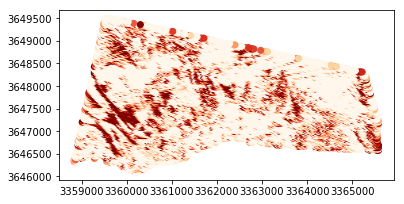

In [21]:
HOGgeo.plot(column='0',cmap='OrRd')
plt.show()

In [22]:
# #Distance from anchberth variable

# berth= gpd.read_file(pathshp +'//navfeatures_ACHARE_Point.shp')
# berth.crs ={'init': 'epsg:4326'}

# # berth= gpd.read_file(pathshp +'//navfeatures_ACHBRT_Point.shp')
# # berth.crs ={'init': 'epsg:4326'}

# berth2= gpd.read_file(pathshp +'//navfeatures_ACHARE_Polygon.shp')
# berth2.crs ={'init': 'epsg:4326'}

# berth = berth.append(berth2)

# berth = berth.to_crs({'init': 'epsg:3035'})
# HOGgeo['berth_dis'] = HOGgeo.geometry.apply(lambda g: berth.distance(g).min())

In [23]:

# HOGgeo['berth_dis'] = 10000

In [24]:
# #Distance from navline valiablle

# navline = gpd.read_file(pathshp +'//navfeatures_NAVLNE_Arc.shp')
# navline.crs ={'init': 'epsg:4326'}

# rectrc= gpd.read_file(pathshp +'//navfeatures_RECTRC_Arc.shp')
# rectrc.crs ={'init': 'epsg:4326'}

# navline = navline.append(rectrc)

# # navline= gpd.read_file(pathshp +'//Navfeatures_DWRTCL_Arc.shp')
# # navline.crs ={'init': 'epsg:4326'}

# navline = navline.to_crs({'init': 'epsg:3035'})
# HOGgeo['navlin_dis'] = HOGgeo.geometry.apply(lambda g: navline.distance(g).min())


In [25]:
# HOGgeo['navlin_dis'] = 10000

In [26]:
# HOGgeo['DN'] = 9
# HOGgeo['DB'] = 9

In [27]:
# HOGgeo.loc[HOGgeo['navlin_dis'] <= 10, 'DN'] = 1
# HOGgeo.loc[(HOGgeo['navlin_dis'] > 10) & (HOGgeo['navlin_dis'] <= 100), 'DN'] = 2
# HOGgeo.loc[(HOGgeo['navlin_dis'] > 100) & (HOGgeo['navlin_dis'] <= 200), 'DN'] = 3
# HOGgeo.loc[(HOGgeo['navlin_dis'] > 200) & (HOGgeo['navlin_dis'] <= 500), 'DN'] = 4
# HOGgeo.loc[(HOGgeo['navlin_dis'] > 500) & (HOGgeo['navlin_dis'] <= 1000), 'DN'] = 5
# HOGgeo.loc[(HOGgeo['navlin_dis'] > 1000) & (HOGgeo['navlin_dis'] <= 2000), 'DN'] = 6
# HOGgeo.loc[(HOGgeo['navlin_dis'] > 2000) & (HOGgeo['navlin_dis'] <= 5000), 'DN'] = 7
# HOGgeo.loc[(HOGgeo['navlin_dis'] > 5000) & (HOGgeo['navlin_dis'] <= 5000), 'DN'] = 8


In [28]:
# HOGgeo.loc[HOGgeo['berth_dis'] <= 10, 'DB'] = 1
# HOGgeo.loc[(HOGgeo['berth_dis'] > 10) & (HOGgeo['berth_dis'] <= 100), 'DB'] = 2
# HOGgeo.loc[(HOGgeo['berth_dis'] > 100) & (HOGgeo['berth_dis'] <= 200), 'DB'] = 3
# HOGgeo.loc[(HOGgeo['berth_dis'] > 200) & (HOGgeo['berth_dis'] <= 500), 'DB'] = 4
# HOGgeo.loc[(HOGgeo['berth_dis'] > 500) & (HOGgeo['berth_dis'] <= 1000), 'DB'] = 5
# HOGgeo.loc[(HOGgeo['berth_dis'] > 1000) & (HOGgeo['berth_dis'] <= 2000), 'DB'] = 6
# HOGgeo.loc[(HOGgeo['berth_dis'] > 2000) & (HOGgeo['berth_dis'] <= 5000), 'DB'] = 7
# HOGgeo.loc[(HOGgeo['berth_dis'] > 5000) & (HOGgeo['berth_dis'] <= 9000), 'DB'] = 8


In [29]:
HOGgeo.reset_index(drop=True, inplace=True)

In [30]:
HOGgeo['mindep'] = 0
HOGgeo['drange']= 0
HOGgeo['cellav']=0
HOGgeo['allav']=0

In [31]:
xm = np.ma.masked_invalid(array)
avdep = np.mean(xm)

In [32]:
for index, row in HOGgeo.iterrows():
   
    r = int(HOGgeo.loc[index,['R']].values)
    c = int(HOGgeo.loc[index,['C']].values)
    rmin = r*hogval
    rmax = r*hogval+hogval
    cmin = c*hogval
    cmax = c*hogval+hogval
    
    b = array[rmin:rmax,cmin:cmax]
    b = b.astype('float')
    
    bm = np.ma.masked_invalid(b)
    
    rangez = np.max(bm)-np.min(bm)
    HOGgeo.loc[index,['drange']] = rangez
    
    HOGgeo.loc[index,['cellav']] = np.mean(bm) - np.min(bm)
    HOGgeo.loc[index,['allav']] = avdep - np.min(bm)
    
    b[np.isnan(b)] = 10000
    HOGgeo.loc[index,['mindep']] = np.min(bm)
    
    

/anaconda/lib/python3.6/site-packages/pandas/core/internals.py:758: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = value


In [33]:
#HOGgeo['drange']= 0

In [34]:
HOGgeo['0']=HOGgeo['0'].fillna(0)
HOGgeo['45']=HOGgeo['45'].fillna(0)
HOGgeo['90']=HOGgeo['90'].fillna(0)
HOGgeo['135']=HOGgeo['135'].fillna(0)
HOGgeo['mindep']=HOGgeo['mindep'].fillna(0)
HOGgeo['drange']=HOGgeo['drange'].fillna(0)
HOGgeo['cellav']=HOGgeo['cellav'].fillna(0)
HOGgeo['allav']=HOGgeo['allav'].fillna(0)

In [35]:
HOGgeo.head(100)

,R,C,0,45,90,135,XA,XB,YA,YB,midX,midY,geometry,mindep,drange,cellav,allav
0,0,0,0.0,0.0,0.0,0.0,3.358785e+06,3.358815e+06,3.646076e+06,3.646106e+06,3.358800e+06,3.646091e+06,POINT (3358800.38429132 3646090.702143703),0.0,0.0,0.0,0.0
1,0,1,0.0,0.0,0.0,0.0,3.358815e+06,3.358845e+06,3.646076e+06,3.646106e+06,3.358830e+06,3.646091e+06,POINT (3358830.38429132 3646090.702143703),0.0,0.0,0.0,0.0
2,0,2,0.0,0.0,0.0,0.0,3.358845e+06,3.358875e+06,3.646076e+06,3.646106e+06,3.358860e+06,3.646091e+06,POINT (3358860.38429132 3646090.702143703),0.0,0.0,0.0,0.0
3,0,3,0.0,0.0,0.0,0.0,3.358875e+06,3.358905e+06,3.646076e+06,3.646106e+06,3.358890e+06,3.646091e+06,POINT (3358890.38429132 3646090.702143703),0.0,0.0,0.0,0.0
4,0,4,0.0,0.0,0.0,0.0,3.358905e+06,3.358935e+06,3.646076e+06,3.646106e+06,3.358920e+06,3.646091e+06,POINT (3358920.38429132 3646090.702143703),0.0,0.0,0.0,0.0
5,0,5,0.0,0.0,0.0,0.0,3.358935e+06,3.358965e+06,3.646076e+06,3.646106e+06,3.358950e+06,3.646091e+06,POINT (3358950.38429132 3646090.702143703),0.0,0.0,0.0,0.0
6,0,6,0.0,0.0,0.0,0.0,3.358965e+06,3.358995e+06,3.646076e+06,3.646106e+06,3.358980e+06,3.646091e+06,POINT (3358980.38429132 3646090.702143703),0.0,0.0,0.0,0.0
7,0,7,0.0,0.0,0.0,0.0,3.358995e+06,3.359025e+06,3.646076e+06,3.646106e+06,3.359010e+06,3.646091e+06,POINT (3359010.38429132 3646090.702143703),0.0,0.0,0.0,0.0
8,0,8,0.0,0.0,0.0,0.0,3.359025e+06,3.359055e+06,3.646076e+06,3.646106e+06,3.359040e+06,3.646091e+06,POINT (3359040.38429132 3646090.702143703),0.0,0.0,0.0,0.0
9,0,9,0.0,0.0,0.0,0.0,3.359055e+06,3.359085e+06,3.646076e+06,3.646106e+06,3.359070e+06,3.646091e+06,POINT (3359070.38429132 3646090.702143703),0.0,0.0,0.0,0.0


In [36]:
#Import selected soundings and project

geometry = [Point(xy) for xy in zip(ss.X, ss.Y)]
crs = {'init': 'epsg:4326'}
ss = gpd.GeoDataFrame(ss, crs=crs, geometry=geometry)

#convert to 3035
ss = ss.to_crs({'init': 'epsg:3035'})

ss['Xp']= ss.geometry.apply(lambda p: p.x)
ss['Yp'] = ss.geometry.apply(lambda p: p.y)

# ss.plot(column='Depth',cmap='OrRd')
# plt.show()

In [37]:
#finding the grid square each sounding in ss is in, saving these hit locations to location

ss['NearestC'] =(ss['Xp'] - minx) /stepxhog
ss['NearestR'] =(ss['Yp'] - miny) /stepyhog

locations = ss.loc[:,['NearestC','NearestR']]

In [38]:
locations

,NearestC,NearestR
0,222.000115,16.588935
1,213.541728,70.856262
2,146.852113,86.104721
3,193.111272,27.623407
4,165.250985,29.149851
5,182.383125,23.624806
6,221.182385,30.021597
7,214.898732,30.002240
8,218.059744,18.433133
9,206.265280,27.077008


In [39]:
floored_locations= locations.apply(np.floor)

In [40]:
len(floored_locations)

92

In [41]:
floored_locations

,NearestC,NearestR
0,222.0,16.0
1,213.0,70.0
2,146.0,86.0
3,193.0,27.0
4,165.0,29.0
5,182.0,23.0
6,221.0,30.0
7,214.0,30.0
8,218.0,18.0
9,206.0,27.0


In [42]:
#floored_locations.loc[56,['NearestR']] = 44

# floored_locations.loc[13,['NearestC']] = 13
# floored_locations.loc[11,['NearestC']] = 13
# floored_locations.loc[0,['NearestC']] = 13

In [43]:
zero_data = np.zeros(shape=(len(floored_locations),29))
positives = pd.DataFrame(zero_data, columns=['A', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10','C11','C12', 'C13','C14','C15', 'C16', 'mindep','cellav','allav','drange'])
#positives = pd.DataFrame()

In [44]:
#angles
B1a = 90
B2a = 135
B3a = 0
B4a = 45
B5a =90
B6a = 135
B7a = 0
B8a = 45
C1a = 90
C2a = 116.6
C3a =135
C4a =153.4
C5a =0
C6a =26.6
C7a =45
C8a =63.4
C9a = 90
C10a = 116.6
C11a = 135
C12a =153.6
C13a = 0 
C14a = 26.6
C15a =45
C16a =63.4

In [45]:
#this is a new method to give the wighted average (based on angles above) for the gradients, also other variables at the index of the floored location (i.e. the grid cell which contains the selected sounding)

for i in range(0,len(floored_locations)):
    fC = floored_locations.iloc[i][0]
    fR = floored_locations.iloc[i][1]
    
     ####Nneed to ask about - using max? or should use the mean? equal weighting
    g = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['0','90','45','135']].values
    positives.loc[i,['A']] = g.max()
    
#     if fR in range(0,rowH) and fC in range(0,colH):
#         g = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['0','90','45','135']].values
#         positives.loc[i,['A']] = g.max()
        
#         positives.loc[i,['mindep']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['mindep']].values
    
#         positives.loc[i,['cellav']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['cellav']].values
    
#         positives.loc[i,['allav']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['allav']].values
    
#         positives.loc[i,['drange']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['drange']].values
#     else:
#         positives.loc[i,['A']] = 0
    
    #B1
    if fR-1 in range(0,rowH) and fC in range(0,colH):
        #dataframe of cell
        B1 = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == (fC))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB1 = (abs(math.cos(math.radians(0-B1a))) * float(B1['0'].values))+ (abs(math.cos(math.radians(45-B1a))) * float(B1['45'].values))+ (abs(math.cos(math.radians(90-B1a))) * float(B1['90'].values)) + (abs(math.cos(math.radians(135-B1a))) * float(B1['135'].values))
        positives.loc[i,['B1']] = waB1
    else:
        positives.loc[i,['B1']] = 0
        
    #B2
    if fR-1 in range(0,rowH) and fC+1 in range(0,colH):
        #dataframe of cell
        B2 = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == (fC+1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB2 = (abs(math.cos(math.radians(0-B2a))) * float(B2['0'].values))+ (abs(math.cos(math.radians(45-B2a))) * float(B2['45'].values))+ (abs(math.cos(math.radians(90-B2a))) * float(B2['90'].values)) + (abs(math.cos(math.radians(135-B2a))) * float(B2['135'].values))
        positives.loc[i,['B2']] = waB2
    else:
        positives.loc[i,['B2']] = 0

    #B3
    if fR in range(0,rowH) and fC+1 in range(0,colH):
        #dataframe of cell
        B3 = HOGgeo[(HOGgeo['R'] == (fR)) & (HOGgeo['C'] == (fC+1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB3 = (abs(math.cos(math.radians(0-B3a))) * float(B3['0'].values))+ (abs(math.cos(math.radians(45-B3a))) * float(B3['45'].values))+ (abs(math.cos(math.radians(90-B3a))) * float(B3['90'].values)) + (abs(math.cos(math.radians(135-B3a))) * float(B3['135'].values))
        positives.loc[i,['B3']] = waB3
    else:
        positives.loc[i,['B3']] = 0

    #B4
    if fR+1 in range(0,rowH) and fC+1 in range(0,colH):
        #dataframe of cell
        B4 = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == (fC+1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB4 = (abs(math.cos(math.radians(0-B4a))) * float(B4['0'].values))+ (abs(math.cos(math.radians(45-B4a))) * float(B4['45'].values))+ (abs(math.cos(math.radians(90-B4a))) * float(B4['90'].values)) + (abs(math.cos(math.radians(135-B4a))) * float(B4['135'].values))
        positives.loc[i,['B4']] = waB4
    else:
        positives.loc[i,['B4']] = 0
        
    #B5
    if fR+1 in range(0,rowH) and fC in range(0,colH):
        #dataframe of cell
        B5 = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == (fC))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB5 = (abs(math.cos(math.radians(0-B5a))) * float(B5['0'].values))+ (abs(math.cos(math.radians(45-B5a))) * float(B5['45'].values))+ (abs(math.cos(math.radians(90-B5a))) * float(B5['90'].values)) + (abs(math.cos(math.radians(135-B5a))) * float(B5['135'].values))
        positives.loc[i,['B5']] = waB5
    else:
        positives.loc[i,['B5']] = 0

    #B6
    if fR+1 in range(0,rowH) and fC-1 in range(0,colH):
        #dataframe of cell
        B6 = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == (fC-1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB6 = (abs(math.cos(math.radians(0-B6a))) * float(B6['0'].values))+ (abs(math.cos(math.radians(45-B6a))) * float(B6['45'].values))+ (abs(math.cos(math.radians(90-B6a))) * float(B6['90'].values)) + (abs(math.cos(math.radians(135-B6a))) * float(B6['135'].values))
        positives.loc[i,['B6']] = waB6
    else:
        positives.loc[i,['B6']] = 0

    #B7
    if fR in range(0,rowH) and fC-1 in range(0,colH):
        #dataframe of cell
        B7 = HOGgeo[(HOGgeo['R'] == (fR)) & (HOGgeo['C'] == (fC-1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB7 = (abs(math.cos(math.radians(0-B7a))) * float(B7['0'].values))+ (abs(math.cos(math.radians(45-B7a))) * float(B7['45'].values))+ (abs(math.cos(math.radians(90-B7a))) * float(B7['90'].values)) + (abs(math.cos(math.radians(135-B7a))) * float(B7['135'].values))
        positives.loc[i,['B7']] = waB7
    else:
        positives.loc[i,['B7']] = 0

    #B8
    if fR-1 in range(0,rowH) and fC-1 in range(0,colH):
        #dataframe of cell
        B8 = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == (fC-1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        waB8 = (abs(math.cos(math.radians(0-B8a))) * float(B8['0'].values))+ (abs(math.cos(math.radians(45-B8a))) * float(B8['45'].values))+ (abs(math.cos(math.radians(90-B8a))) * float(B8['90'].values)) + (abs(math.cos(math.radians(135-B8a))) * float(B8['135'].values))
        positives.loc[i,['B8']] = waB8
    else:
        positives.loc[i,['B8']] = 0
        
    #C1
    if fR-2 in range(0,rowH) and fC in range(0,colH):
        C1 = HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == (fC))].loc[:,['0','45','90','135']]
        waC1 = (abs(math.cos(math.radians(0-C1a))) * float(C1['0'].values))+ (abs(math.cos(math.radians(45-C1a))) * float(C1['45'].values))+ (abs(math.cos(math.radians(90-C1a))) * float(C1['90'].values)) + (abs(math.cos(math.radians(135-C1a))) * float(C1['135'].values))
        positives.loc[i,['C1']] = waC1
    else:
        positives.loc[i,['C1']] = 0
    
    #C2
    if fR-2 in range(0,rowH) and fC+1 in range(0,colH):
        C2 = HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == (fC+1))].loc[:,['0','45','90','135']]
        waC2 = (abs(math.cos(math.radians(0-C2a))) * float(C2['0'].values))+ (abs(math.cos(math.radians(45-C2a))) * float(C2['45'].values))+ (abs(math.cos(math.radians(90-C2a))) * float(C2['90'].values)) + (abs(math.cos(math.radians(135-C2a))) * float(C2['135'].values))
        positives.loc[i,['C2']] = waC2
    else:
        positives.loc[i,['C2']] = 0
    
    #C3
    if fR-2 in range(0,rowH) and fC+2 in range(0,colH):
        C3 = HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == (fC+2))].loc[:,['0','45','90','135']]
        waC3 = (abs(math.cos(math.radians(0-C3a))) * float(C3['0'].values))+ (abs(math.cos(math.radians(45-C3a))) * float(C3['45'].values))+ (abs(math.cos(math.radians(90-C3a))) * float(C3['90'].values)) + (abs(math.cos(math.radians(135-C3a))) * float(C3['135'].values))
        positives.loc[i,['C3']] = waC3
    else:
        positives.loc[i,['C3']] = 0
    
    #C4
    if fR-1 in range(0,rowH) and fC+2 in range(0,colH):
        C4 = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == (fC+2))].loc[:,['0','45','90','135']]
        waC4 = (abs(math.cos(math.radians(0-C4a))) * float(C4['0'].values))+ (abs(math.cos(math.radians(45-C4a))) * float(C4['45'].values))+ (abs(math.cos(math.radians(90-C4a))) * float(C4['90'].values)) + (abs(math.cos(math.radians(135-C4a))) * float(C4['135'].values))
        positives.loc[i,['C4']] = waC4
    else:
        positives.loc[i,['C4']] = 0
        
    #C5
    if fR in range(0,rowH) and fC+2 in range(0,colH):
        C5 = HOGgeo[(HOGgeo['R'] == (fR)) & (HOGgeo['C'] == (fC+2))].loc[:,['0','45','90','135']]
        waC5 = (abs(math.cos(math.radians(0-C5a))) * float(C5['0'].values))+ (abs(math.cos(math.radians(45-C5a))) * float(C5['45'].values))+ (abs(math.cos(math.radians(90-C5a))) * float(C5['90'].values)) + (abs(math.cos(math.radians(135-C5a))) * float(C5['135'].values))
        positives.loc[i,['C5']] = waC5
    else:
        positives.loc[i,['C5']] = 0
        
    #C6
    if fR+1 in range(0,rowH) and fC+2 in range(0,colH):
        C6 = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == (fC+2))].loc[:,['0','45','90','135']]
        waC6 = (abs(math.cos(math.radians(0-C6a))) * float(C6['0'].values))+ (abs(math.cos(math.radians(45-C6a))) * float(C6['45'].values))+ (abs(math.cos(math.radians(90-C6a))) * float(C6['90'].values)) + (abs(math.cos(math.radians(135-C6a))) * float(C6['135'].values))
        positives.loc[i,['C6']] = waC6
    else:
        positives.loc[i,['C6']] = 0
        
    #C7
    if fR+2 in range(0,rowH) and fC+2 in range(0,colH):
        C7 = HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == (fC+2))].loc[:,['0','45','90','135']]
        waC7 = (abs(math.cos(math.radians(0-C7a))) * float(C7['0'].values))+ (abs(math.cos(math.radians(45-C7a))) * float(C7['45'].values))+ (abs(math.cos(math.radians(90-C7a))) * float(C7['90'].values)) + (abs(math.cos(math.radians(135-C7a))) * float(C7['135'].values))
        positives.loc[i,['C7']] = waC7
    else:
        positives.loc[i,['C7']] = 0
        
    #C8
    if fR+2 in range(0,rowH) and fC+1 in range(0,colH):
        C8 = HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == (fC+1))].loc[:,['0','45','90','135']]
        waC8 = (abs(math.cos(math.radians(0-C8a))) * float(C8['0'].values))+ (abs(math.cos(math.radians(45-C8a))) * float(C8['45'].values))+ (abs(math.cos(math.radians(90-C8a))) * float(C8['90'].values)) + (abs(math.cos(math.radians(135-C8a))) * float(C8['135'].values))
        positives.loc[i,['C8']] = waC8
    else:
        positives.loc[i,['C8']] = 0
        
    #C9
    if fR+2 in range(0,rowH) and fC in range(0,colH):
        C9 = HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == (fC))].loc[:,['0','45','90','135']]
        waC9 = (abs(math.cos(math.radians(0-C9a))) * float(C9['0'].values))+ (abs(math.cos(math.radians(45-C9a))) * float(C9['45'].values))+ (abs(math.cos(math.radians(90-C9a))) * float(C9['90'].values)) + (abs(math.cos(math.radians(135-C9a))) * float(C9['135'].values))
        positives.loc[i,['C9']] = waC9
    else:
        positives.loc[i,['C9']] = 0
        
    #C10
    if fR+2 in range(0,rowH) and fC-1 in range(0,colH):
        C10 = HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == (fC-1))].loc[:,['0','45','90','135']]
        waC10 = (abs(math.cos(math.radians(0-C10a))) * float(C10['0'].values))+ (abs(math.cos(math.radians(45-C10a))) * float(C10['45'].values))+ (abs(math.cos(math.radians(90-C10a))) * float(C10['90'].values)) + (abs(math.cos(math.radians(135-C10a))) * float(C10['135'].values))
        positives.loc[i,['C10']] = waC10
    else:
        positives.loc[i,['C10']] = 0
        
    #C11
    if fR+2 in range(0,rowH) and fC-2 in range(0,colH):
        C11 = HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == (fC-2))].loc[:,['0','45','90','135']]
        waC11 = (abs(math.cos(math.radians(0-C11a))) * float(C11['0'].values))+ (abs(math.cos(math.radians(45-C11a))) * float(C11['45'].values))+ (abs(math.cos(math.radians(90-C11a))) * float(C11['90'].values)) + (abs(math.cos(math.radians(135-C11a))) * float(C11['135'].values))
        positives.loc[i,['C11']] = waC11
    else:
        positives.loc[i,['C11']] = 0
        
    #C12
    if fR+1 in range(0,rowH) and fC-2 in range(0,colH):
        C12 = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == (fC-2))].loc[:,['0','45','90','135']]
        waC12 = (abs(math.cos(math.radians(0-C12a))) * float(C12['0'].values))+ (abs(math.cos(math.radians(45-C12a))) * float(C12['45'].values))+ (abs(math.cos(math.radians(90-C12a))) * float(C12['90'].values)) + (abs(math.cos(math.radians(135-C12a))) * float(C12['135'].values))
        positives.loc[i,['C12']] = waC12
    else:
        positives.loc[i,['C12']] = 0
        
    #C13
    if fR in range(0,rowH) and fC-2 in range(0,colH):
        C13 = HOGgeo[(HOGgeo['R'] == (fR)) & (HOGgeo['C'] == (fC-2))].loc[:,['0','45','90','135']]
        waC13 = (abs(math.cos(math.radians(0-C13a))) * float(C13['0'].values))+ (abs(math.cos(math.radians(45-C13a))) * float(C13['45'].values))+ (abs(math.cos(math.radians(90-C13a))) * float(C13['90'].values)) + (abs(math.cos(math.radians(135-C13a))) * float(C13['135'].values))
        positives.loc[i,['C13']] = waC13
    else:
        positives.loc[i,['C13']] = 0
        
    #C14
    if fR-1 in range(0,rowH) and fC-2 in range(0,colH):
        C14 = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == (fC-2))].loc[:,['0','45','90','135']]
        waC14 = (abs(math.cos(math.radians(0-C14a))) * float(C14['0'].values))+ (abs(math.cos(math.radians(45-C14a))) * float(C14['45'].values))+ (abs(math.cos(math.radians(90-C14a))) * float(C14['90'].values)) + (abs(math.cos(math.radians(135-C14a))) * float(C14['135'].values))
        positives.loc[i,['C14']] = waC14
    else:
        positives.loc[i,['C14']] = 0
        
    #C15
    if fR-2 in range(0,rowH) and fC-2 in range(0,colH):
        C15 = HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == (fC-2))].loc[:,['0','45','90','135']]
        waC15 = (abs(math.cos(math.radians(0-C15a))) * float(C15['0'].values))+ (abs(math.cos(math.radians(45-C15a))) * float(C15['45'].values))+ (abs(math.cos(math.radians(90-C15a))) * float(C15['90'].values)) + (abs(math.cos(math.radians(135-C15a))) * float(C15['135'].values))
        positives.loc[i,['C15']] = waC15
    else:
        positives.loc[i,['C15']] = 0
        
    #C16
    if fR-2 in range(0,rowH) and fC-1 in range(0,colH):
        C16 = HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == (fC-1))].loc[:,['0','45','90','135']]
        waC16 = (abs(math.cos(math.radians(0-C16a))) * float(C16['0'].values))+ (abs(math.cos(math.radians(45-C16a))) * float(C16['45'].values))+ (abs(math.cos(math.radians(90-C16a))) * float(C16['90'].values)) + (abs(math.cos(math.radians(135-C16a))) * float(C16['135'].values))
        positives.loc[i,['C16']] = waC16
    else:
        positives.loc[i,['C16']] = 0
        
    
        
# simple method for single directions - just taking that one direction       
# positives.loc[i,['B1']] = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == fC)].loc[:,['90']].values if fR-1 in range(0,row) and fC in range(0,col) else 0
#   positives.loc[i,['B2']] = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == (fC+1))].loc[:,['135']].values if fR-1 in range(0,row) and fC+1 in range(0,col) else 0
#     positives.loc[i,['B3']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == (fC+1))].loc[:,['0']].values if fR in range(0,row) and fC+1 in range(0,col) else 0
#     positives.loc[i,['B4']] = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == (fC+1))].loc[:,['45']].values if fR+1 in range(0,row) and fC+1 in range(0,col) else 0
#     positives.loc[i,['B5']] = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == fC)].loc[:,['90']].values if fR+1 in range(0,row) and fC in range(0,col) else 0
#     positives.loc[i,['B6']] = HOGgeo[(HOGgeo['R'] == (fR+1)) & (HOGgeo['C'] == (fC-1))].loc[:,['135']].values if fR+1 in range(0,row) and fC-1 in range(0,col) else 0
#     positives.loc[i,['B7']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == (fC-1))].loc[:,['0']].values if fR in range(0,row) and fC-1 in range(0,col) else 0
#     positives.loc[i,['B8']] = HOGgeo[(HOGgeo['R'] == (fR-1)) & (HOGgeo['C'] == (fC-1))].loc[:,['45']].values if fR-1 in range(0,row) and fC-1 in range(0,col) else 0
    
#     positives.loc[i,['C1']] =  HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == fC)].loc[:,['90']].values if fR-2 in range(0,row) and fC in range(0,col) else 0
#     positives.loc[i,['C3']] =HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == (fC+2))].loc[:,['135']].values if fR-2 in range(0,row) and fC+2 in range(0,col) else 0
#     positives.loc[i,['C5']] =HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == (fC+2))].loc[:,['0']].values if fR in range(0,row) and fC+2 in range(0,col) else 0
#     positives.loc[i,['C7']] =HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == (fC+2))].loc[:,['45']].values if fR+2 in range(0,row) and fC+2 in range(0,col) else 0
#     positives.loc[i,['C9']] =HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == fC)].loc[:,['90']].values if fR+2 in range(0,row) and fC in range(0,col) else 0
#     positives.loc[i,['C11']] =HOGgeo[(HOGgeo['R'] == (fR+2)) & (HOGgeo['C'] == (fC-2))].loc[:,['135']].values if fR+2 in range(0,row) and fC-2 in range(0,col) else 0
#     positives.loc[i,['C13']] =HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == (fC-2))].loc[:,['0']].values if fR in range(0,row) and fC-2 in range(0,col) else 0
#     positives.loc[i,['C15']] =HOGgeo[(HOGgeo['R'] == (fR-2)) & (HOGgeo['C'] == (fC-2))].loc[:,['45']].values if fR-2 in range(0,row) and fC-2 in range(0,col) else 0
    
#     positives.loc[i,['DN']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['DN']].values
    
#     positives.loc[i,['DB']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['DB']].values
    
    positives.loc[i,['mindep']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['mindep']].values
    
    positives.loc[i,['cellav']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['cellav']].values
    
    positives.loc[i,['allav']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['allav']].values
    
    positives.loc[i,['drange']] = HOGgeo[(HOGgeo['R'] == fR) & (HOGgeo['C'] == fC)].loc[:,['drange']].values

In [46]:
# positives

In [47]:
o = positives.isnull().sum().sum()
print(o)

0


In [48]:
if o > 0:
    #convert nans to 0
    positives = positives.fillna(0)

In [49]:
positives['Selection']=1

In [50]:
positives

,A,B1,B2,B3,B4,B5,B6,B7,B8,C1,...,C12,C13,C14,C15,C16,mindep,cellav,allav,drange,Selection
0,0.635214,0.000000e+00,0.000000e+00,7.070528e-01,1.915484e-01,5.046003e-01,5.967412e-01,7.811315e-01,0.000000e+00,0.000000e+00,...,0.895690,9.999638e-01,0.000000,0.000000e+00,0.000000,9.754167,0.954969,6.817929,1.518910,1
1,0.750783,3.562780e-01,9.188905e-01,7.999318e-01,6.122424e-17,6.122818e-17,7.070400e-01,9.385832e-01,2.623447e-01,7.070616e-01,...,0.947618,7.069432e-01,0.315589,6.121893e-17,0.338354,17.184000,0.332380,-0.611904,0.672000,1
2,0.844142,7.070277e-01,6.122478e-17,8.808447e-01,9.998754e-01,9.210409e-01,1.766269e-01,5.685448e-01,8.541251e-01,7.070474e-01,...,0.368290,7.070565e-01,0.926363,9.999228e-01,0.948798,23.376000,0.274788,-6.803904,0.528167,1
3,0.888394,7.067183e-01,6.678616e-01,8.641336e-01,9.181168e-01,7.069450e-01,1.994793e-01,3.127055e-01,9.996540e-01,5.085059e-01,...,0.735755,8.410420e-01,0.651384,6.297177e-01,0.782149,15.657692,0.032870,0.914403,0.065385,1
4,0.999667,7.067816e-01,7.068472e-01,9.998706e-01,6.769246e-01,7.069240e-01,6.121855e-17,5.168723e-01,9.995303e-01,4.123294e-01,...,0.492405,2.373867e-01,0.438011,8.107149e-01,0.948486,12.883333,0.099880,3.688762,0.212500,1
5,0.617885,5.920095e-01,1.405991e-01,7.069689e-01,9.997718e-01,7.069840e-01,6.121623e-17,7.795195e-01,9.430458e-01,5.589223e-01,...,0.402499,7.069418e-01,0.948696,8.941155e-01,0.642027,13.929167,0.109474,2.642929,0.262833,1
6,0.733944,6.122925e-17,1.488417e-01,9.999430e-01,7.070801e-01,6.123045e-17,7.702772e-01,8.281294e-01,7.969966e-01,6.123022e-17,...,0.895675,9.999544e-01,0.894114,5.665410e-01,0.396513,8.096154,0.646963,8.475942,1.219846,1
7,0.999965,7.533555e-01,4.209845e-01,4.840919e-01,6.122271e-17,7.796659e-01,9.998481e-01,6.083511e-01,6.122806e-17,9.377398e-01,...,0.947624,7.856016e-01,0.763116,7.070621e-01,0.488013,12.923077,0.928067,3.649019,1.472923,1
8,0.669254,6.122903e-17,7.070863e-01,4.917885e-01,5.057852e-01,5.481700e-01,8.504634e-01,6.403160e-01,7.818290e-01,8.027013e-01,...,0.821167,6.120997e-17,0.347971,0.000000e+00,0.000000,12.620000,0.340111,3.952096,0.568462,1
9,0.550511,5.501989e-01,8.491599e-01,2.158274e-01,2.640222e-01,5.757831e-01,9.699098e-01,5.232266e-01,7.068396e-01,7.068906e-01,...,0.420726,7.066452e-01,0.579464,8.310853e-01,0.926264,16.220833,0.159567,0.351262,0.329167,1


In [51]:
positives.to_csv(savepath+"HOGpositives_"+survey+"_25_"+str(step)+"m_o4p"+str(hogval)+"b1_"+str(breakdown)+".csv")

In [52]:
#use geopandas to get cell distance from SS

HOGgeo['distoss'] = HOGgeo.geometry.apply(lambda g: ss.distance(g).min())
# HOGgeo.plot(column='distoss',cmap='binary')
# plt.show()

In [53]:
negatives = pd.DataFrame(zero_data, columns=['A', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10','C11','C12', 'C13','C14','C15', 'C16', 'mindep','cellav','allav','drange'])

In [54]:
Potential_neg = HOGgeo[(HOGgeo.distoss> 80) & (HOGgeo.distoss< 600)]

print(len(Potential_neg))

21263


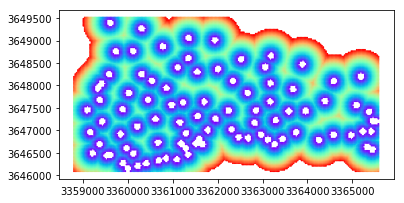

In [55]:
Potential_neg.plot( column='distoss',cmap='rainbow',markersize=1)
plt.show()

In [56]:
 #reset indexes
Potential_neg.reset_index(drop=True, inplace=True)  

In [57]:
negs = int(len(ss)*1.5)
print (negs)

138


In [58]:
from random import randint
t=[randint(0,len(Potential_neg)) for p in range(0,negs)]
print (t)

[5698, 18026, 18729, 248, 11130, 7358, 18024, 13409, 15609, 15404, 19138, 5422, 20816, 6216, 13343, 16291, 9991, 284, 10879, 13829, 14068, 11434, 11380, 21224, 20839, 19529, 6070, 19122, 10134, 3113, 8470, 10139, 2809, 691, 5253, 3792, 14638, 7434, 18573, 18111, 15533, 17650, 348, 13857, 8427, 12970, 15808, 17551, 15346, 5051, 9418, 14520, 8238, 1214, 17282, 12280, 6562, 10780, 18564, 9976, 43, 18662, 7183, 16403, 12977, 4361, 2931, 20621, 4948, 17021, 9105, 15426, 12856, 14203, 18249, 12188, 20390, 7130, 5811, 12065, 18952, 276, 4762, 18318, 6072, 2685, 12499, 17586, 11590, 20730, 11849, 913, 16033, 7462, 14597, 1118, 12287, 17471, 7037, 14253, 1291, 19316, 17242, 1215, 9346, 8006, 5066, 1730, 18718, 13585, 10047, 10872, 16019, 10182, 340, 12248, 8651, 1903, 18399, 14579, 20488, 6630, 12432, 9382, 15308, 19511, 596, 10885, 11471, 8546, 12805, 20131, 9094, 13725, 15702, 18632, 11725, 17775]


In [59]:
# select the rows at these indexes (t)
tempdf = pd.DataFrame()
for i in t:
    tempdf = tempdf.append(Potential_neg.iloc[i])

In [60]:
tempdf

,0,135,45,90,C,R,XA,XB,YA,YB,allav,cellav,distoss,drange,geometry,midX,midY,mindep
5698,0.000000,0.741008,0.258381,0.000000,185.0,30.0,3.364335e+06,3.364365e+06,3.646976e+06,3.647006e+06,1.191326,0.048476,226.461655,0.103231,POINT (3364350.38429132 3646990.702143703),3.364350e+06,3.646991e+06,15.380769
18026,0.260529,0.000000,0.739232,0.000000,37.0,91.0,3.359895e+06,3.359925e+06,3.648806e+06,3.648836e+06,-3.819904,0.131792,189.606633,0.272000,POINT (3359910.38429132 3648820.702143703),3.359910e+06,3.648821e+06,20.392000
18729,0.000000,0.805232,0.000000,0.194501,74.0,95.0,3.361005e+06,3.361035e+06,3.648926e+06,3.648956e+06,-3.183904,0.094963,255.802861,0.252000,POINT (3361020.38429132 3648940.702143703),3.361020e+06,3.648941e+06,19.756000
248,0.000000,0.000000,0.000000,0.000000,220.0,1.0,3.365385e+06,3.365415e+06,3.646106e+06,3.646136e+06,0.000000,0.000000,454.899617,0.000000,POINT (3365400.38429132 3646120.702143703),3.365400e+06,3.646121e+06,0.000000
11130,0.848790,0.036833,0.114194,0.000000,104.0,57.0,3.361905e+06,3.361935e+06,3.647786e+06,3.647816e+06,-2.423904,0.091469,274.210554,0.148000,POINT (3361920.38429132 3647800.702143703),3.361920e+06,3.647801e+06,18.996000
7358,0.000000,0.000000,0.000000,0.000000,2.0,39.0,3.358845e+06,3.358875e+06,3.647246e+06,3.647276e+06,0.000000,0.000000,304.881368,0.000000,POINT (3358860.38429132 3647260.702143703),3.358860e+06,3.647261e+06,0.000000
18024,0.999657,0.000000,0.000000,0.000000,35.0,91.0,3.359835e+06,3.359865e+06,3.648806e+06,3.648836e+06,-4.236238,0.084900,135.514073,0.167667,POINT (3359850.38429132 3648820.702143703),3.359850e+06,3.648821e+06,20.808333
13409,0.000000,0.000000,0.000000,0.999550,74.0,68.0,3.361005e+06,3.361035e+06,3.648116e+06,3.648146e+06,-1.427904,0.065638,249.642215,0.129167,POINT (3361020.38429132 3648130.702143703),3.361020e+06,3.648131e+06,18.000000
15609,0.000000,0.000000,0.000000,0.000000,206.0,78.0,3.364965e+06,3.364995e+06,3.648416e+06,3.648446e+06,0.000000,0.000000,311.787411,0.000000,POINT (3364980.38429132 3648430.702143703),3.364980e+06,3.648431e+06,0.000000
15404,0.000000,0.000000,0.000000,0.000000,205.0,77.0,3.364935e+06,3.364965e+06,3.648386e+06,3.648416e+06,0.000000,0.000000,312.934133,0.000000,POINT (3364950.38429132 3648400.702143703),3.364950e+06,3.648401e+06,0.000000


In [61]:
negloc = tempdf.loc[:,['C','R']]

In [62]:
#reset indexes
negloc.reset_index(drop=True, inplace=True)  
#print(negloc)

In [63]:
for i in range(0,len(negloc)):
    nC = negloc.iloc[i][0]
    nR = negloc.iloc[i][1]
    
    ####Nneed to ask about - using max? or should use the mean? equal weighting
    f = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['0','90','45','135']].values
    negatives.loc[i,['A']] = f.max()
        
    #B1
    if nR-1 in range(0,rowH) and nC in range(0,colH):
        #datanRame of cell
        B1 = HOGgeo[(HOGgeo['R'] == (nR-1)) & (HOGgeo['C'] == (nC))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB1 = (abs(math.cos(math.radians(0-B1a))) * float(B1['0'].values))+ (abs(math.cos(math.radians(45-B1a))) * float(B1['45'].values))+ (abs(math.cos(math.radians(90-B1a))) * float(B1['90'].values)) + (abs(math.cos(math.radians(135-B1a))) * float(B1['135'].values))
        negatives.loc[i,['B1']] = wanB1
    else:
        negatives.loc[i,['B1']] = 0
        
    #B2
    if nR-1 in range(0,rowH) and nC+1 in range(0,colH):
        #datanRame of cell
        B2 = HOGgeo[(HOGgeo['R'] == (nR-1)) & (HOGgeo['C'] == (nC+1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB2 = (abs(math.cos(math.radians(0-B2a))) * float(B2['0'].values))+ (abs(math.cos(math.radians(45-B2a))) * float(B2['45'].values))+ (abs(math.cos(math.radians(90-B2a))) * float(B2['90'].values)) + (abs(math.cos(math.radians(135-B2a))) * float(B2['135'].values))
        negatives.loc[i,['B2']] = wanB2
    else:
        negatives.loc[i,['B2']] = 0

    #B3
    if nR in range(0,rowH) and nC+1 in range(0,colH):
        #datanRame of cell
        B3 = HOGgeo[(HOGgeo['R'] == (nR)) & (HOGgeo['C'] == (nC+1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB3 = (abs(math.cos(math.radians(0-B3a))) * float(B3['0'].values))+ (abs(math.cos(math.radians(45-B3a))) * float(B3['45'].values))+ (abs(math.cos(math.radians(90-B3a))) * float(B3['90'].values)) + (abs(math.cos(math.radians(135-B3a))) * float(B3['135'].values))
        negatives.loc[i,['B3']] = wanB3
    else:
        negatives.loc[i,['B3']] = 0

    #B4
    if nR+1 in range(0,rowH) and nC+1 in range(0,colH):
        #datanRame of cell
        B4 = HOGgeo[(HOGgeo['R'] == (nR+1)) & (HOGgeo['C'] == (nC+1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB4 = (abs(math.cos(math.radians(0-B4a))) * float(B4['0'].values))+ (abs(math.cos(math.radians(45-B4a))) * float(B4['45'].values))+ (abs(math.cos(math.radians(90-B4a))) * float(B4['90'].values)) + (abs(math.cos(math.radians(135-B4a))) * float(B4['135'].values))
        negatives.loc[i,['B4']] = wanB4
    else:
        negatives.loc[i,['B4']] = 0
        
    #B5
    if nR+1 in range(0,rowH) and nC in range(0,colH):
        #datanRame of cell
        B5 = HOGgeo[(HOGgeo['R'] == (nR+1)) & (HOGgeo['C'] == (nC))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB5 = (abs(math.cos(math.radians(0-B5a))) * float(B5['0'].values))+ (abs(math.cos(math.radians(45-B5a))) * float(B5['45'].values))+ (abs(math.cos(math.radians(90-B5a))) * float(B5['90'].values)) + (abs(math.cos(math.radians(135-B5a))) * float(B5['135'].values))
        negatives.loc[i,['B5']] = wanB5
    else:
        negatives.loc[i,['B5']] = 0

    #B6
    if nR+1 in range(0,rowH) and nC-1 in range(0,colH):
        #datanRame of cell
        B6 = HOGgeo[(HOGgeo['R'] == (nR+1)) & (HOGgeo['C'] == (nC-1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB6 = (abs(math.cos(math.radians(0-B6a))) * float(B6['0'].values))+ (abs(math.cos(math.radians(45-B6a))) * float(B6['45'].values))+ (abs(math.cos(math.radians(90-B6a))) * float(B6['90'].values)) + (abs(math.cos(math.radians(135-B6a))) * float(B6['135'].values))
        negatives.loc[i,['B6']] = wanB6
    else:
        negatives.loc[i,['B6']] = 0

    #B7
    if nR in range(0,rowH) and nC-1 in range(0,colH):
        #datanRame of cell
        B7 = HOGgeo[(HOGgeo['R'] == (nR)) & (HOGgeo['C'] == (nC-1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB7 = (abs(math.cos(math.radians(0-B7a))) * float(B7['0'].values))+ (abs(math.cos(math.radians(45-B7a))) * float(B7['45'].values))+ (abs(math.cos(math.radians(90-B7a))) * float(B7['90'].values)) + (abs(math.cos(math.radians(135-B7a))) * float(B7['135'].values))
        negatives.loc[i,['B7']] = wanB7
    else:
        negatives.loc[i,['B7']] = 0

    #B8
    if nR-1 in range(0,rowH) and nC-1 in range(0,colH):
        #datanRame of cell
        B8 = HOGgeo[(HOGgeo['R'] == (nR-1)) & (HOGgeo['C'] == (nC-1))].loc[:,['0','45','90','135']]
        # (intensity* weight0) + (inentisty *weight45) + inentisty *weight90) + inentisty *weight 135)
        wanB8 = (abs(math.cos(math.radians(0-B8a))) * float(B8['0'].values))+ (abs(math.cos(math.radians(45-B8a))) * float(B8['45'].values))+ (abs(math.cos(math.radians(90-B8a))) * float(B8['90'].values)) + (abs(math.cos(math.radians(135-B8a))) * float(B8['135'].values))
        negatives.loc[i,['B8']] = wanB8
    else:
        negatives.loc[i,['B8']] = 0
        
    #C1
    if nR-2 in range(0,rowH) and nC in range(0,colH):
        C1 = HOGgeo[(HOGgeo['R'] == (nR-2)) & (HOGgeo['C'] == (nC))].loc[:,['0','45','90','135']]
        wanC1 = (abs(math.cos(math.radians(0-C1a))) * float(C1['0'].values))+ (abs(math.cos(math.radians(45-C1a))) * float(C1['45'].values))+ (abs(math.cos(math.radians(90-C1a))) * float(C1['90'].values)) + (abs(math.cos(math.radians(135-C1a))) * float(C1['135'].values))
        negatives.loc[i,['C1']] = wanC1
    else:
        negatives.loc[i,['C1']] = 0
    
    #C2
    if nR-2 in range(0,rowH) and nC+1 in range(0,colH):
        C2 = HOGgeo[(HOGgeo['R'] == (nR-2)) & (HOGgeo['C'] == (nC+1))].loc[:,['0','45','90','135']]
        wanC2 = (abs(math.cos(math.radians(0-C2a))) * float(C2['0'].values))+ (abs(math.cos(math.radians(45-C2a))) * float(C2['45'].values))+ (abs(math.cos(math.radians(90-C2a))) * float(C2['90'].values)) + (abs(math.cos(math.radians(135-C2a))) * float(C2['135'].values))
        negatives.loc[i,['C2']] = wanC2
    else:
        negatives.loc[i,['C2']] = 0
    
    #C3
    if nR-2 in range(0,rowH) and nC+2 in range(0,colH):
        C3 = HOGgeo[(HOGgeo['R'] == (nR-2)) & (HOGgeo['C'] == (nC+2))].loc[:,['0','45','90','135']]
        wanC3 = (abs(math.cos(math.radians(0-C3a))) * float(C3['0'].values))+ (abs(math.cos(math.radians(45-C3a))) * float(C3['45'].values))+ (abs(math.cos(math.radians(90-C3a))) * float(C3['90'].values)) + (abs(math.cos(math.radians(135-C3a))) * float(C3['135'].values))
        negatives.loc[i,['C3']] = wanC3
    else:
        negatives.loc[i,['C3']] = 0
    
    #C4
    if nR-1 in range(0,rowH) and nC+2 in range(0,colH):
        C4 = HOGgeo[(HOGgeo['R'] == (nR-1)) & (HOGgeo['C'] == (nC+2))].loc[:,['0','45','90','135']]
        wanC4 = (abs(math.cos(math.radians(0-C4a))) * float(C4['0'].values))+ (abs(math.cos(math.radians(45-C4a))) * float(C4['45'].values))+ (abs(math.cos(math.radians(90-C4a))) * float(C4['90'].values)) + (abs(math.cos(math.radians(135-C4a))) * float(C4['135'].values))
        negatives.loc[i,['C4']] = wanC4
    else:
        negatives.loc[i,['C4']] = 0
        
    #C5
    if nR in range(0,rowH) and nC+2 in range(0,colH):
        C5 = HOGgeo[(HOGgeo['R'] == (nR)) & (HOGgeo['C'] == (nC+2))].loc[:,['0','45','90','135']]
        wanC5 = (abs(math.cos(math.radians(0-C5a))) * float(C5['0'].values))+ (abs(math.cos(math.radians(45-C5a))) * float(C5['45'].values))+ (abs(math.cos(math.radians(90-C5a))) * float(C5['90'].values)) + (abs(math.cos(math.radians(135-C5a))) * float(C5['135'].values))
        negatives.loc[i,['C5']] = wanC5
    else:
        negatives.loc[i,['C5']] = 0
        
    #C6
    if nR+1 in range(0,rowH) and nC+2 in range(0,colH):
        C6 = HOGgeo[(HOGgeo['R'] == (nR+1)) & (HOGgeo['C'] == (nC+2))].loc[:,['0','45','90','135']]
        wanC6 = (abs(math.cos(math.radians(0-C6a))) * float(C6['0'].values))+ (abs(math.cos(math.radians(45-C6a))) * float(C6['45'].values))+ (abs(math.cos(math.radians(90-C6a))) * float(C6['90'].values)) + (abs(math.cos(math.radians(135-C6a))) * float(C6['135'].values))
        negatives.loc[i,['C6']] = wanC6
    else:
        negatives.loc[i,['C6']] = 0
        
    #C7
    if nR+2 in range(0,rowH) and nC+2 in range(0,colH):
        C7 = HOGgeo[(HOGgeo['R'] == (nR+2)) & (HOGgeo['C'] == (nC+2))].loc[:,['0','45','90','135']]
        wanC7 = (abs(math.cos(math.radians(0-C7a))) * float(C7['0'].values))+ (abs(math.cos(math.radians(45-C7a))) * float(C7['45'].values))+ (abs(math.cos(math.radians(90-C7a))) * float(C7['90'].values)) + (abs(math.cos(math.radians(135-C7a))) * float(C7['135'].values))
        negatives.loc[i,['C7']] = wanC7
    else:
        negatives.loc[i,['C7']] = 0
        
    #C8
    if nR+2 in range(0,rowH) and nC+1 in range(0,colH):
        C8 = HOGgeo[(HOGgeo['R'] == (nR+2)) & (HOGgeo['C'] == (nC+1))].loc[:,['0','45','90','135']]
        wanC8 = (abs(math.cos(math.radians(0-C8a))) * float(C8['0'].values))+ (abs(math.cos(math.radians(45-C8a))) * float(C8['45'].values))+ (abs(math.cos(math.radians(90-C8a))) * float(C8['90'].values)) + (abs(math.cos(math.radians(135-C8a))) * float(C8['135'].values))
        negatives.loc[i,['C8']] = wanC8
    else:
        negatives.loc[i,['C8']] = 0
        
    #C9
    if nR+2 in range(0,rowH) and nC in range(0,colH):
        C9 = HOGgeo[(HOGgeo['R'] == (nR+2)) & (HOGgeo['C'] == (nC))].loc[:,['0','45','90','135']]
        wanC9 = (abs(math.cos(math.radians(0-C9a))) * float(C9['0'].values))+ (abs(math.cos(math.radians(45-C9a))) * float(C9['45'].values))+ (abs(math.cos(math.radians(90-C9a))) * float(C9['90'].values)) + (abs(math.cos(math.radians(135-C9a))) * float(C9['135'].values))
        negatives.loc[i,['C9']] = wanC9
    else:
        negatives.loc[i,['C9']] = 0
        
    #C10
    if nR+2 in range(0,rowH) and nC-1 in range(0,colH):
        C10 = HOGgeo[(HOGgeo['R'] == (nR+2)) & (HOGgeo['C'] == (nC-1))].loc[:,['0','45','90','135']]
        wanC10 = (abs(math.cos(math.radians(0-C10a))) * float(C10['0'].values))+ (abs(math.cos(math.radians(45-C10a))) * float(C10['45'].values))+ (abs(math.cos(math.radians(90-C10a))) * float(C10['90'].values)) + (abs(math.cos(math.radians(135-C10a))) * float(C10['135'].values))
        negatives.loc[i,['C10']] = wanC10
    else:
        negatives.loc[i,['C10']] = 0
        
    #C11
    if nR+2 in range(0,rowH) and nC-2 in range(0,colH):
        C11 = HOGgeo[(HOGgeo['R'] == (nR+2)) & (HOGgeo['C'] == (nC-2))].loc[:,['0','45','90','135']]
        wanC11 = (abs(math.cos(math.radians(0-C11a))) * float(C11['0'].values))+ (abs(math.cos(math.radians(45-C11a))) * float(C11['45'].values))+ (abs(math.cos(math.radians(90-C11a))) * float(C11['90'].values)) + (abs(math.cos(math.radians(135-C11a))) * float(C11['135'].values))
        negatives.loc[i,['C11']] = wanC11
    else:
        negatives.loc[i,['C11']] = 0
        
    #C12
    if nR+1 in range(0,rowH) and nC-2 in range(0,colH):
        C12 = HOGgeo[(HOGgeo['R'] == (nR+1)) & (HOGgeo['C'] == (nC-2))].loc[:,['0','45','90','135']]
        wanC12 = (abs(math.cos(math.radians(0-C12a))) * float(C12['0'].values))+ (abs(math.cos(math.radians(45-C12a))) * float(C12['45'].values))+ (abs(math.cos(math.radians(90-C12a))) * float(C12['90'].values)) + (abs(math.cos(math.radians(135-C12a))) * float(C12['135'].values))
        negatives.loc[i,['C12']] = wanC12
    else:
        negatives.loc[i,['C12']] = 0
        
    #C13
    if nR in range(0,rowH) and nC-2 in range(0,colH):
        C13 = HOGgeo[(HOGgeo['R'] == (nR)) & (HOGgeo['C'] == (nC-2))].loc[:,['0','45','90','135']]
        wanC13 = (abs(math.cos(math.radians(0-C13a))) * float(C13['0'].values))+ (abs(math.cos(math.radians(45-C13a))) * float(C13['45'].values))+ (abs(math.cos(math.radians(90-C13a))) * float(C13['90'].values)) + (abs(math.cos(math.radians(135-C13a))) * float(C13['135'].values))
        negatives.loc[i,['C13']] = wanC13
    else:
        negatives.loc[i,['C13']] = 0
        
    #C14
    if nR-1 in range(0,rowH) and nC-2 in range(0,colH):
        C14 = HOGgeo[(HOGgeo['R'] == (nR-1)) & (HOGgeo['C'] == (nC-2))].loc[:,['0','45','90','135']]
        wanC14 = (abs(math.cos(math.radians(0-C14a))) * float(C14['0'].values))+ (abs(math.cos(math.radians(45-C14a))) * float(C14['45'].values))+ (abs(math.cos(math.radians(90-C14a))) * float(C14['90'].values)) + (abs(math.cos(math.radians(135-C14a))) * float(C14['135'].values))
        negatives.loc[i,['C14']] = wanC14
    else:
        negatives.loc[i,['C14']] = 0
        
    #C15
    if nR-2 in range(0,rowH) and nC-2 in range(0,colH):
        C15 = HOGgeo[(HOGgeo['R'] == (nR-2)) & (HOGgeo['C'] == (nC-2))].loc[:,['0','45','90','135']]
        wanC15 = (abs(math.cos(math.radians(0-C15a))) * float(C15['0'].values))+ (abs(math.cos(math.radians(45-C15a))) * float(C15['45'].values))+ (abs(math.cos(math.radians(90-C15a))) * float(C15['90'].values)) + (abs(math.cos(math.radians(135-C15a))) * float(C15['135'].values))
        negatives.loc[i,['C15']] = wanC15
    else:
        negatives.loc[i,['C15']] = 0
        
    #C16
    if nR-2 in range(0,rowH) and nC-1 in range(0,colH):
        C16 = HOGgeo[(HOGgeo['R'] == (nR-2)) & (HOGgeo['C'] == (nC-1))].loc[:,['0','45','90','135']]
        wanC16 = (abs(math.cos(math.radians(0-C16a))) * float(C16['0'].values))+ (abs(math.cos(math.radians(45-C16a))) * float(C16['45'].values))+ (abs(math.cos(math.radians(90-C16a))) * float(C16['90'].values)) + (abs(math.cos(math.radians(135-C16a))) * float(C16['135'].values))
        negatives.loc[i,['C16']] = wanC16
    else:
        negatives.loc[i,['C16']] = 0
        
#     negatives.loc[i,['DN']] = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['DN']].values
    
#     negatives.loc[i,['DB']] = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['DB']].values
    
    negatives.loc[i,['mindep']] = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['mindep']].values
    
    negatives.loc[i,['cellav']] = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['cellav']].values
    
    negatives.loc[i,['allav']] = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['allav']].values
    
    negatives.loc[i,['drange']] = HOGgeo[(HOGgeo['R'] == nR) & (HOGgeo['C'] == nC)].loc[:,['drange']].values

In [64]:
negatives

,A,B1,B2,B3,B4,B5,B6,B7,B8,C1,...,C11,C12,C13,C14,C15,C16,mindep,cellav,allav,drange
0,0.741008,4.989739e-01,5.159322e-01,7.067752e-01,8.708512e-01,5.655122e-01,7.068111e-01,9.996802e-01,7.781114e-01,5.265006e-01,...,7.067886e-01,0.513531,7.691567e-01,0.836789,8.587095e-01,0.856911,15.380769,0.048476,1.191326,0.103231
1,0.739232,6.121255e-17,7.068892e-01,9.997293e-01,8.561481e-01,6.121523e-17,7.069245e-01,8.577923e-01,5.390989e-01,6.120395e-17,...,7.068710e-01,0.895410,9.996566e-01,0.924247,1.740274e-01,0.447558,20.392000,0.131792,-3.819904,0.272000
2,0.805232,2.351899e-01,7.394664e-01,9.589964e-01,8.520686e-01,7.069734e-01,9.350987e-01,6.122032e-17,1.183075e-01,9.994316e-01,...,6.840916e-01,0.667349,6.122098e-17,0.315557,4.854840e-01,0.788249,19.756000,0.094963,-3.183904,0.252000
3,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.848790,6.122447e-17,1.443583e-01,8.409207e-01,9.342785e-01,7.945514e-01,6.122789e-17,6.645277e-01,7.631328e-01,6.121768e-17,...,7.239283e-01,0.733212,7.069205e-01,0.743723,7.814559e-01,0.447634,18.996000,0.091469,-2.423904,0.148000
5,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.999657,3.939211e-01,7.763056e-01,8.577923e-01,7.069245e-01,6.121168e-17,7.068394e-01,8.641616e-01,8.832559e-01,5.327661e-01,...,5.312407e-01,0.906989,9.995401e-01,0.638891,8.535763e-01,0.380598,20.808333,0.084900,-4.236238,0.167667
7,0.999550,7.792756e-01,9.547152e-01,6.121295e-17,7.068510e-01,9.995828e-01,9.993869e-01,3.973504e-01,6.121320e-17,9.219252e-01,...,9.701522e-01,0.810878,7.069010e-01,0.315550,6.121115e-17,0.334144,18.000000,0.065638,-1.427904,0.129167
8,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,1.705862e-01,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.705862e-01,7.069053e-01,...,0.000000e+00,0.000000,0.000000e+00,0.350183,1.817486e-01,0.735787,0.000000,0.000000,0.000000,0.000000


In [65]:
negatives['Selection']=0

In [66]:
l = negatives.isnull().sum().sum()

In [67]:
if l > 0:
    #convert nans to 0
    negatives = negatives.fillna(0)

In [68]:
negatives.to_csv(savepath+"HOGnegatives_"+survey+"_25_"+str(step)+"m_o4p"+str(hogval)+"b1_"+str(breakdown)+".csv")

##### 